In [43]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sksurv.linear_model import CoxPHSurvivalAnalysis
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from lifelines import CoxPHFitter
import shap
import xgboost
import matplotlib.pyplot as plt
from bayes_opt import BayesianOptimization
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [93]:
df= pd.read_csv('MB_3_cohort-Joyce-update.csv')
print(df.shape)
nunique = df.nunique()
cols_to_drop = nunique[nunique == 1].index
df=df.drop(cols_to_drop, axis=1)
print(df.shape)

df_genetic = df[(df['train_test'] == 0)]
print(df_genetic.shape)
df_genetic.reset_index(inplace=True)
# X = feature values
X = df_genetic.iloc[:, np.r_[38:1749]]
print(X)
X = np.array(X)
y = df_genetic["y_3years"]
y = np.array(y)

(1066, 7947)
(1066, 6900)
(590, 6900)
     T2_diagnostics_Image-original_Mean  \
0                             -1.686463   
1                             -1.458612   
2                             -1.416047   
3                             -1.382110   
4                             -2.619631   
..                                  ...   
585                           -1.873080   
586                           -1.652704   
587                           -1.997115   
588                           -1.786397   
589                           -2.579980   

     T2_diagnostics_Image-original_Minimum  \
0                                -2.373405   
1                                -1.913629   
2                                -1.697859   
3                                -1.765115   
4                                -3.398471   
..                                     ...   
585                              -2.251359   
586                              -2.227540   
587                            

In [94]:
from __future__ import print_function
import numpy as np
#from sklearn import datasets, linear_model
from genetic_selection import GeneticSelectionCV
import random
from lightgbm import LGBMClassifier
#import xgboost as xgb
#from sksurv.metrics import concordance_index_censored as ci_scikit
#from xgbse.metrics import concordance_index

random.seed(45)
#estimator = xgb.XGBRegressor(objective='survival:cox',
                       #booster='gblinear')
#linear_model.LogisticRegression(solver="liblinear")
estimator = LGBMClassifier()
selector = GeneticSelectionCV(estimator,
                              cv=5,
                              verbose=1,
                              scoring="roc_auc",
                              max_features=15,
                              n_population=7000,#this is set to be 10N, being N the number of features
                              crossover_proba=0.5,
                              mutation_proba=0.2,
                              n_generations=40,
                              crossover_independent_proba=0.5,
                              mutation_independent_proba=0.05,
                              tournament_size=50,
                              n_gen_no_change=10,
                              caching=True,
                              n_jobs=-1)
selector = selector.fit(X, y)

print(selector.support_)
'''
Tournament Selection:

Tournament selection is a method of selecting an individual from a population of individuals.
Tournament selection involves running several "tournaments" among a few individuals chosen at random from the population.
The winner of each tournament (the one with the best fitness) is selected for crossover.
When the tournament size is smaller, Tournament selection also gives a chance to all individuals to be selected and thus it preserves diversity, although keeping diversity may degrade the convergence speed.
But if the tournament size is larger, weak individuals have a smaller chance to be selected causes loss of diversity .
PseudoCode:

choose k (the tournament size) individuals from the population at random
choose the best individual from pool/tournament with probability p
choose the second best individual with probability p*(1-p)
choose the third best individual with probability p*((1-p)^2)
and so on...
Deterministic tournament selection selects the best individual (when p = 1) in any tournament. A 1-way tournament (k = 1) selection is equivalent to random selection. The chosen individual can be removed from the population that the selection is made from if desired, otherwise individuals can be selected more than once for the next generation. In comparison with the (stochastic) fitness proportionate selection method, tournament selection is often implemented in practice due to its lack of stochastic noise.
n_gen_no_change : int, default None
        If set to a number, it will terminate optimization when best individual is not
        changing in all of the previous ``n_gen_no_change`` number of generations.
max_features : int or None, optional
        The maximum number of features selected.
crossover_proba : float, default=0.5
        Probability of crossover for the genetic algorithm.
    mutation_proba : float, default=0.2
        Probability of mutation for the genetic algorithm.
    n_generations : int, default=40
        Number of generations for the genetic algorithm.
    crossover_independent_proba : float, default=0.1
        Independent probability for each attribute to be exchanged, for the genetic algorithm.
    mutation_independent_proba : float, default=0.05
        Independent probability for each attribute to be mutated, for the genetic algorithm.
    tournament_size : int, default=3
        Tournament size for the genetic algorithm.
'''

Selecting features with genetic algorithm.
gen	nevals	avg                            	std                            	min                            	max                               
0  	7000  	[ 0.494167  8.028429  0.042989]	[ 0.033652  4.298294  0.015581]	[ 0.368621  1.        0.      ]	[  0.614187  15.         0.123942]
1  	4173  	[-2035.269465    23.274429  2035.7498  ]	[ 4026.763131    34.129668  4026.520286]	[-10000.      0.      0.]      	[     0.646841    120.        10000.      ]
2  	4146  	[-2123.817578    23.686714  2124.32394 ]	[ 4090.508076    34.88981   4090.245096]	[-10000.            0.            0.009264]	[     0.66486    119.       10000.     ]   
3  	4258  	[-2032.363182    23.714429  2032.894247]	[ 4024.682799    34.500067  4024.414543]	[-10000.      0.      0.]                  	[     0.715862    120.        10000.      ]
4  	4159  	[-1965.196092    23.519714  1965.746005]	[ 3974.310948    34.111861  3974.038941]	[-10000.      0.      0.]                  	[    

'\nTournament Selection:\n\nTournament selection is a method of selecting an individual from a population of individuals.\nTournament selection involves running several "tournaments" among a few individuals chosen at random from the population.\nThe winner of each tournament (the one with the best fitness) is selected for crossover.\nWhen the tournament size is smaller, Tournament selection also gives a chance to all individuals to be selected and thus it preserves diversity, although keeping diversity may degrade the convergence speed.\nBut if the tournament size is larger, weak individuals have a smaller chance to be selected causes loss of diversity .\nPseudoCode:\n\nchoose k (the tournament size) individuals from the population at random\nchoose the best individual from pool/tournament with probability p\nchoose the second best individual with probability p*(1-p)\nchoose the third best individual with probability p*((1-p)^2)\nand so on...\nDeterministic tournament selection selects

In [14]:
selector.support_ = pd.DataFrame(selector.support_)
selector.support_.to_csv('selected_features_t2_tumor_train.csv')

In [15]:
#t1 tumor
df= pd.read_csv('MB_3_cohort-Joyce-update.csv')
print(df.shape)
nunique = df.nunique()
cols_to_drop = nunique[nunique == 1].index
df=df.drop(cols_to_drop, axis=1)
print(df.shape)

df_genetic = df[(df['train_test'] == 1)|(df['train_test'] == 0)]
print(df_genetic.shape)
df_genetic.reset_index(inplace=True)
# X = feature values
X = df_genetic.iloc[:, np.r_[1749:3460]]
#print(X)
X = np.array(X)
selector = selector.fit(X, y)
print(selector.support_)
selector.support_ = pd.DataFrame(selector.support_)
selector.support_.to_csv('selected_features_t1_tumor.csv')

(1066, 7947)
(1066, 6900)
(738, 6900)
Selecting features with genetic algorithm.
gen	nevals	avg                            	std                            	min                            	max                               
0  	7000  	[ 0.495257  8.032143  0.037942]	[ 0.029431  4.327879  0.013537]	[ 0.381624  1.        0.      ]	[  0.608996  15.         0.098384]
1  	4135  	[-2162.425323    24.912857  2162.886702]	[ 4117.339965    34.703559  4117.097587]	[-10000.            0.            0.003115]	[     0.627438    126.        10000.      ]
2  	4172  	[-2140.971665    25.599286  2141.459245]	[ 4102.502445    34.464211  4102.247922]	[-10000.            0.            0.003753]	[     0.661879    124.        10000.      ]
3  	4152  	[-2016.656906    25.404     2017.172229]	[ 4013.044205    33.865194  4012.785164]	[-10000.            0.            0.004519]	[     0.676332    122.        10000.      ]
4  	4194  	[-2063.777405    26.645429  2064.314599]	[ 4047.675912    33.949332  4047.40193 ]

In [50]:
# read .csv data file for t2 tumor

df= pd.read_csv('MB_3_cohort-Joyce-update.csv')
print(df.shape)
nunique = df.nunique()
cols_to_drop = nunique[nunique == 1].index
df=df.drop(cols_to_drop, axis=1)
print(df.shape)

df_genetic = df[(df['train_test'] == 1)|(df['train_test'] == 0)]
print(df_genetic.shape)
df_genetic.reset_index(inplace=True)
# X = feature values
X_clinic = df_genetic.iloc[:, np.r_[2,3,25]]
X = df_genetic.iloc[:, np.r_[38:1749]]
s=pd.read_csv('selected_features_t2_tumor.csv')
s=s.iloc[:,1]
s=np.array(s)
x=X.loc[:, s]
x['Age'] = X_clinic['Age']
x['Sex'] = X_clinic['Sex']
x['Hydrocephalus'] = X_clinic['Hydrocephalus']
feature_names = x.columns.tolist()
x['y'] = df_genetic["y_3years"]
x['train_test'] = df_genetic['train_test']

df_val1 = df[df['Cohort'] == 2]
df_val1 = df_val1[df_val1['y_3years'].notnull()]
df_val1.reset_index(inplace=True)
X_clinic_val1 = df_val1.iloc[:, np.r_[2,3,25]]
X_val1 = df_val1.iloc[:, np.r_[38:1749]]
X_val1=X_val1.loc[:, s]
X_val1['Age'] = X_clinic_val1['Age']
X_val1['Sex'] = X_clinic_val1['Sex']
X_val1['Hydrocephalus'] = X_clinic_val1['Hydrocephalus']
X_val1=np.array(X_val1)
y_val1 = df_val1["y_3years"]
y_val1=np.array(y_val1)

df_val2 = df[df['Cohort'] == 3]
df_val2 = df_val2[df_val2['y_3years'].notnull()]
df_val2.reset_index(inplace=True)
X_clinic_val2 = df_val2.iloc[:, np.r_[2,3,25]]
X_val2 = df_val2.iloc[:, np.r_[38:1749]]
X_val2=X_val2.loc[:, s]
X_val2['Age'] = X_clinic_val2['Age']
X_val2['Sex'] = X_clinic_val2['Sex']
X_val2['Hydrocephalus'] = X_clinic_val2['Hydrocephalus']
X_val2=np.array(X_val2)
y_val2 = df_val2["y_3years"]
y_val2=np.array(y_val2)

print('Feature Names : ')
feature_names

(1066, 7947)
(1066, 6900)
(738, 6900)
Feature Names : 


['T2_original_firstorder_Minimum',
 'T2_original_ngtdm_Strength',
 'T2_log-sigma-1-mm-3D_ngtdm_Strength',
 'T2_log-sigma-3-mm-3D_glcm_SumEntropy',
 'T2_log-sigma-5-mm-3D_glrlm_ShortRunHighGrayLevelEmphasis',
 'T2_square_glrlm_RunLengthNonUniformity',
 'T2_wavelet-LLH_glcm_Correlation',
 'T2_wavelet-LLH_gldm_DependenceVariance',
 'T2_wavelet-LHH_glrlm_RunLengthNonUniformity',
 'T2_wavelet-HLL_glszm_LowGrayLevelZoneEmphasis',
 'T2_wavelet-HLH_ngtdm_Coarseness',
 'T2_wavelet-HHH_glcm_Autocorrelation',
 'T2_wavelet-LLL_glrlm_LowGrayLevelRunEmphasis',
 'Age',
 'Sex',
 'Hydrocephalus']

In [51]:
# Split data into train - val - test
X_train0 = x[(x['train_test'] == 0)]
X_train = X_train0.iloc[:, np.r_[0:16]]
X_train=np.array(X_train)
y_train = X_train0['y']

X_test0 = x[(x['train_test'] == 1)]
X_test = X_test0.iloc[:, np.r_[0:16]]
X_test=np.array(X_test)
y_test = X_test0['y']

print('size of data partitions')
print('...............INPUT..............OUTPUT..........')
print('Train      : ', X_train.shape, '         ', y_train.shape)
print('Test       : ', X_test.shape, '         ', y_test.shape)
print('Validation1 : ', X_val1.shape, '         ', y_val1.shape)
print('Validation2 : ', X_val2.shape, '         ', y_val2.shape)

size of data partitions
...............INPUT..............OUTPUT..........
Train      :  (590, 16)           (590,)
Test       :  (148, 16)           (148,)
Validation1 :  (78, 16)           (78,)
Validation2 :  (122, 16)           (122,)


In [61]:
seed=1

In [68]:
def lgb_evaluate(max_depth, num_leaves, learning_rate, max_bin, colsample_bytree, reg_alpha, 
                 reg_lambda, subsample, min_child_samples, min_child_weight, n_estimators, scale_pos_weight):
  
    params = {'max_depth': int(max_depth),
              'num_leaves':int(num_leaves),
              'learning_rate' :learning_rate,
              'max_bin':int(max_bin),
              'colsample_bytree': colsample_bytree,
              'random_state': seed,
              'reg_alpha':reg_alpha,
              'reg_lambda':reg_lambda,
              'subsample': subsample,
              'min_child_samples' : int(min_child_samples),
              'min_child_weight' : min_child_weight,
              'n_estimators' :int(n_estimators),
              'scale_pos_weight':scale_pos_weight
             }
    modellgb = LGBMClassifier()
    modellgb.set_params(**params)
    clf_lg= modellgb.fit(X_train,y_train)
    p_lg_train=clf_lg.predict_proba(X_train)[:,1]
    p_lg_test=clf_lg.predict_proba(X_test)[:,1]
    p_lg_val1=clf_lg.predict_proba(X_val1)[:,1]
    p_lg_val2=clf_lg.predict_proba(X_val2)[:,1]

    lg_auc_train = roc_auc_score(y_train, p_lg_train)
    lg_auc_test = roc_auc_score(y_test, p_lg_test)
    lg_auc_val1 = roc_auc_score(y_val1, p_lg_val1)
    lg_auc_val2 = roc_auc_score(y_val2, p_lg_val2)
    #print ('Model Parameters', modellgb.get_params())
    print('************************************')
    print('Train AUC       : ', np.round(lg_auc_train, decimals=4))
    print('Test AUC       : ', np.round(lg_auc_test, decimals=4)) 
    print('Validation1 AUC : ', np.round(lg_auc_val1, decimals=4))
    print('Validation2 AUC : ', np.round(lg_auc_val2, decimals=4))
    print (modellgb.get_params())
    return np.round(lg_auc_test, decimals=4)

In [69]:
#bayesian optimization of hyperparameters for lg_boost
gp_params = {"alpha": 1e-4}

lgb_bo = BayesianOptimization(lgb_evaluate, {'max_depth': (1, 10), 
                                             'num_leaves': (2,10),
                                             'learning_rate':(0.01, 0.4),
                                             'max_bin':(200, 800),
                                             'colsample_bytree': (0.01, 1.0),
                                             'reg_alpha':(1,10),
                                             'reg_lambda':(0.01,1),
                                             'subsample':(0.01,1),
                                             'min_child_samples' : (5, 30),
                                             'min_child_weight':(1, 5),
                                             'n_estimators' :(500,2200),
                                             'scale_pos_weight': (1,7)
                                            })

# Optimally needs quite a few more initiation points and number of iterations
lgb_bo.maximize(init_points=200, n_iter=50, acq='ei',  **gp_params)

|   iter    |  target   | colsam... | learni... |  max_bin  | max_depth | min_ch... | min_ch... | n_esti... | num_le... | reg_alpha | reg_la... | scale_... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------
************************************
Train AUC       :  0.96
Test AUC       :  0.6244
Validation1 AUC :  0.6242
Validation2 AUC :  0.5291
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.6572542595897691, 'importance_type': 'split', 'learning_rate': 0.17905992889681138, 'max_depth': 5, 'min_child_samples': 27, 'min_child_weight': 3.8879526098330963, 'min_split_gain': 0.0, 'n_estimators': 789, 'n_jobs': -1, 'num_leaves': 8, 'objective': None, 'random_state': 1, 'reg_alpha': 6.07738667940739, 'reg_lambda': 0.2048597762942768, 'silent': 'warn', 'subsample': 0.9625263788491792, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'max_bin

************************************
Train AUC       :  0.9989
Test AUC       :  0.7025
Validation1 AUC :  0.5525
Validation2 AUC :  0.495
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.15777140915382398, 'importance_type': 'split', 'learning_rate': 0.38979489231309583, 'max_depth': 6, 'min_child_samples': 8, 'min_child_weight': 1.4464131997344816, 'min_split_gain': 0.0, 'n_estimators': 1763, 'n_jobs': -1, 'num_leaves': 3, 'objective': None, 'random_state': 1, 'reg_alpha': 2.153146298258484, 'reg_lambda': 0.9951071116638246, 'silent': 'warn', 'subsample': 0.8642603356169313, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'max_bin': 416, 'scale_pos_weight': 3.0552769363061927}
| 9         | 0.7025    | 0.1578    | 0.3898    | 416.5     | 6.882     | 8.984     | 1.446     | 1.764e+03 | 3.436     | 2.153     | 0.9951    | 3.055     | 0.8643    |
************************************
Train AUC       :  1.0
Test AUC       :  0.7238
Validation1 AUC :  0.5926
Validati

************************************
Train AUC       :  0.9227
Test AUC       :  0.6259
Validation1 AUC :  0.5579
Validation2 AUC :  0.5381
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.29533950661875497, 'importance_type': 'split', 'learning_rate': 0.35683103698339996, 'max_depth': 6, 'min_child_samples': 6, 'min_child_weight': 3.89473547177287, 'min_split_gain': 0.0, 'n_estimators': 517, 'n_jobs': -1, 'num_leaves': 3, 'objective': None, 'random_state': 1, 'reg_alpha': 8.52189476849281, 'reg_lambda': 0.9450629747641196, 'silent': 'warn', 'subsample': 0.9386271189641753, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'max_bin': 590, 'scale_pos_weight': 5.219806289312272}
| 18        | 0.6259    | 0.2953    | 0.3568    | 590.3     | 6.596     | 6.537     | 3.895     | 517.2     | 3.565     | 8.522     | 0.9451    | 5.22      | 0.9386    |
************************************
Train AUC       :  0.9994
Test AUC       :  0.6619
Validation1 AUC :  0.5671
Validatio

************************************
Train AUC       :  0.9765
Test AUC       :  0.6624
Validation1 AUC :  0.6088
Validation2 AUC :  0.4866
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.2262405116218095, 'importance_type': 'split', 'learning_rate': 0.26155658341698856, 'max_depth': 8, 'min_child_samples': 25, 'min_child_weight': 2.131040645555132, 'min_split_gain': 0.0, 'n_estimators': 1492, 'n_jobs': -1, 'num_leaves': 4, 'objective': None, 'random_state': 1, 'reg_alpha': 7.023371687556816, 'reg_lambda': 0.216362757241154, 'silent': 'warn', 'subsample': 0.7878890418049075, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'max_bin': 433, 'scale_pos_weight': 6.956425410839729}
| 27        | 0.6624    | 0.2262    | 0.2616    | 433.7     | 8.022     | 25.18     | 2.131     | 1.492e+03 | 4.122     | 7.023     | 0.2164    | 6.956     | 0.7879    |
************************************
Train AUC       :  0.9271
Test AUC       :  0.5586
Validation1 AUC :  0.608
Validati

| 35        | 0.6902    | 0.1263    | 0.2202    | 786.3     | 3.94      | 17.24     | 2.982     | 833.6     | 3.017     | 2.02      | 0.1912    | 6.92      | 0.3518    |
************************************
Train AUC       :  0.9927
Test AUC       :  0.6552
Validation1 AUC :  0.5787
Validation2 AUC :  0.4935
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.36836649403928984, 'importance_type': 'split', 'learning_rate': 0.19470658044030908, 'max_depth': 9, 'min_child_samples': 23, 'min_child_weight': 3.1643082928507864, 'min_split_gain': 0.0, 'n_estimators': 557, 'n_jobs': -1, 'num_leaves': 6, 'objective': None, 'random_state': 1, 'reg_alpha': 4.962866883574853, 'reg_lambda': 0.6654108079224423, 'silent': 'warn', 'subsample': 0.49611159315585024, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'max_bin': 312, 'scale_pos_weight': 2.966288510068463}
| 36        | 0.6552    | 0.3684    | 0.1947    | 312.6     | 9.69      | 23.13     | 3.164     | 557.7     | 6.434   

************************************
Train AUC       :  0.7966
Test AUC       :  0.5713
Validation1 AUC :  0.635
Validation2 AUC :  0.5583
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.1485004310728622, 'importance_type': 'split', 'learning_rate': 0.03541083423784729, 'max_depth': 1, 'min_child_samples': 9, 'min_child_weight': 4.918411383212748, 'min_split_gain': 0.0, 'n_estimators': 819, 'n_jobs': -1, 'num_leaves': 3, 'objective': None, 'random_state': 1, 'reg_alpha': 7.982474455244773, 'reg_lambda': 0.27913482184475635, 'silent': 'warn', 'subsample': 0.44025086026404225, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'max_bin': 484, 'scale_pos_weight': 4.874084323741438}
| 45        | 0.5713    | 0.1485    | 0.03541   | 484.5     | 1.019     | 9.528     | 4.918     | 819.6     | 3.459     | 7.982     | 0.2791    | 4.874     | 0.4403    |
************************************
Train AUC       :  0.9939
Test AUC       :  0.6809
Validation1 AUC :  0.5648
Validat

************************************
Train AUC       :  0.9633
Test AUC       :  0.614
Validation1 AUC :  0.588
Validation2 AUC :  0.5206
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.834278901227913, 'importance_type': 'split', 'learning_rate': 0.1171080797719684, 'max_depth': 7, 'min_child_samples': 26, 'min_child_weight': 3.404917218020816, 'min_split_gain': 0.0, 'n_estimators': 1177, 'n_jobs': -1, 'num_leaves': 6, 'objective': None, 'random_state': 1, 'reg_alpha': 4.787742366844748, 'reg_lambda': 0.41516110462027017, 'silent': 'warn', 'subsample': 0.760765094190324, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'max_bin': 559, 'scale_pos_weight': 1.1830742426436447}
| 58        | 0.614     | 0.8343    | 0.1171    | 559.0     | 7.037     | 26.57     | 3.405     | 1.178e+03 | 6.547     | 4.788     | 0.4152    | 1.183     | 0.7608    |
************************************
Train AUC       :  0.9835
Test AUC       :  0.6462
Validation1 AUC :  0.6057
Validatio

************************************
Train AUC       :  0.9978
Test AUC       :  0.6863
Validation1 AUC :  0.5664
Validation2 AUC :  0.4953
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.5105485254138662, 'importance_type': 'split', 'learning_rate': 0.36422228010651675, 'max_depth': 3, 'min_child_samples': 19, 'min_child_weight': 1.4502075404061752, 'min_split_gain': 0.0, 'n_estimators': 1920, 'n_jobs': -1, 'num_leaves': 4, 'objective': None, 'random_state': 1, 'reg_alpha': 3.6338430412597678, 'reg_lambda': 0.4757269353035483, 'silent': 'warn', 'subsample': 0.1389056913066413, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'max_bin': 221, 'scale_pos_weight': 3.8848974166568837}
| 67        | 0.6863    | 0.5105    | 0.3642    | 221.0     | 3.616     | 19.02     | 1.45      | 1.92e+03  | 4.051     | 3.634     | 0.4757    | 3.885     | 0.1389    |
************************************
Train AUC       :  0.8499
Test AUC       :  0.5666
Validation1 AUC :  0.6435
Val

************************************
Train AUC       :  1.0
Test AUC       :  0.6753
Validation1 AUC :  0.5764
Validation2 AUC :  0.4694
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.3546443521144356, 'importance_type': 'split', 'learning_rate': 0.3944868481607678, 'max_depth': 9, 'min_child_samples': 25, 'min_child_weight': 2.6655216401094255, 'min_split_gain': 0.0, 'n_estimators': 1462, 'n_jobs': -1, 'num_leaves': 6, 'objective': None, 'random_state': 1, 'reg_alpha': 1.6410031858436116, 'reg_lambda': 0.3084976042448031, 'silent': 'warn', 'subsample': 0.08490482624122879, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'max_bin': 587, 'scale_pos_weight': 3.645476245125293}
| 80        | 0.6753    | 0.3546    | 0.3945    | 587.2     | 9.015     | 25.26     | 2.666     | 1.463e+03 | 6.626     | 1.641     | 0.3085    | 3.645     | 0.0849    |
************************************
Train AUC       :  0.9888
Test AUC       :  0.669
Validation1 AUC :  0.5887
Validati

************************************
Train AUC       :  0.9935
Test AUC       :  0.6544
Validation1 AUC :  0.5702
Validation2 AUC :  0.4731
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.056400456397875234, 'importance_type': 'split', 'learning_rate': 0.30620414877304925, 'max_depth': 4, 'min_child_samples': 11, 'min_child_weight': 4.43840942945476, 'min_split_gain': 0.0, 'n_estimators': 904, 'n_jobs': -1, 'num_leaves': 8, 'objective': None, 'random_state': 1, 'reg_alpha': 3.563487793133544, 'reg_lambda': 0.4016064858224201, 'silent': 'warn', 'subsample': 0.22789292611068465, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'max_bin': 592, 'scale_pos_weight': 6.002254660109964}
| 92        | 0.6544    | 0.0564    | 0.3062    | 592.8     | 4.755     | 11.57     | 4.438     | 904.1     | 8.648     | 3.563     | 0.4016    | 6.002     | 0.2279    |
************************************
Train AUC       :  0.8894
Test AUC       :  0.5912
Validation1 AUC :  0.5903
Valid

************************************
Train AUC       :  0.8555
Test AUC       :  0.5814
Validation1 AUC :  0.6065
Validation2 AUC :  0.5414
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.3292772350905723, 'importance_type': 'split', 'learning_rate': 0.04654824839427691, 'max_depth': 3, 'min_child_samples': 6, 'min_child_weight': 3.3619765253936693, 'min_split_gain': 0.0, 'n_estimators': 1368, 'n_jobs': -1, 'num_leaves': 2, 'objective': None, 'random_state': 1, 'reg_alpha': 5.103311338634585, 'reg_lambda': 0.46980194134312814, 'silent': 'warn', 'subsample': 0.7864619455484896, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'max_bin': 318, 'scale_pos_weight': 6.304190843885461}
| 104       | 0.5814    | 0.3293    | 0.04655   | 318.5     | 3.232     | 6.945     | 3.362     | 1.369e+03 | 2.545     | 5.103     | 0.4698    | 6.304     | 0.7865    |
************************************
Train AUC       :  0.9524
Test AUC       :  0.6378
Validation1 AUC :  0.5779
Valid

************************************
Train AUC       :  0.8795
Test AUC       :  0.5881
Validation1 AUC :  0.5957
Validation2 AUC :  0.533
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.17470565319633777, 'importance_type': 'split', 'learning_rate': 0.18497766552976214, 'max_depth': 1, 'min_child_samples': 18, 'min_child_weight': 1.160387702380104, 'min_split_gain': 0.0, 'n_estimators': 1560, 'n_jobs': -1, 'num_leaves': 6, 'objective': None, 'random_state': 1, 'reg_alpha': 6.073274059314505, 'reg_lambda': 0.17413846414420694, 'silent': 'warn', 'subsample': 0.31707652781593193, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'max_bin': 288, 'scale_pos_weight': 3.296018334395731}
| 113       | 0.5881    | 0.1747    | 0.185     | 288.5     | 1.813     | 18.65     | 1.16      | 1.56e+03  | 6.742     | 6.073     | 0.1741    | 3.296     | 0.3171    |
************************************
Train AUC       :  0.8715
Test AUC       :  0.5657
Validation1 AUC :  0.6219
Vali

************************************
Train AUC       :  0.9802
Test AUC       :  0.6248
Validation1 AUC :  0.6134
Validation2 AUC :  0.5363
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.9451005844107087, 'importance_type': 'split', 'learning_rate': 0.290529418285311, 'max_depth': 6, 'min_child_samples': 7, 'min_child_weight': 2.95350269947344, 'min_split_gain': 0.0, 'n_estimators': 952, 'n_jobs': -1, 'num_leaves': 8, 'objective': None, 'random_state': 1, 'reg_alpha': 8.116646890999558, 'reg_lambda': 0.727937649058477, 'silent': 'warn', 'subsample': 0.4418303135396428, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'max_bin': 790, 'scale_pos_weight': 3.396346556756589}
| 123       | 0.6248    | 0.9451    | 0.2905    | 790.5     | 6.257     | 7.268     | 2.954     | 952.7     | 8.639     | 8.117     | 0.7279    | 3.396     | 0.4418    |
************************************
Train AUC       :  0.9006
Test AUC       :  0.5922
Validation1 AUC :  0.5671
Validation2 

************************************
Train AUC       :  0.8741
Test AUC       :  0.5791
Validation1 AUC :  0.6103
Validation2 AUC :  0.5285
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.9891442704767255, 'importance_type': 'split', 'learning_rate': 0.30283013184750124, 'max_depth': 1, 'min_child_samples': 24, 'min_child_weight': 3.227317273137925, 'min_split_gain': 0.0, 'n_estimators': 2004, 'n_jobs': -1, 'num_leaves': 5, 'objective': None, 'random_state': 1, 'reg_alpha': 6.322626352046284, 'reg_lambda': 0.46575006043119294, 'silent': 'warn', 'subsample': 0.7290273994873945, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'max_bin': 512, 'scale_pos_weight': 2.9792891543845146}
| 134       | 0.5791    | 0.9891    | 0.3028    | 512.2     | 1.159     | 24.87     | 3.227     | 2.005e+03 | 5.824     | 6.323     | 0.4658    | 2.979     | 0.729     |
************************************
Train AUC       :  0.8932
Test AUC       :  0.5754
Validation1 AUC :  0.6265
Vali

************************************
Train AUC       :  0.8932
Test AUC       :  0.5931
Validation1 AUC :  0.6211
Validation2 AUC :  0.4971
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.5945124610540821, 'importance_type': 'split', 'learning_rate': 0.38047093574431723, 'max_depth': 3, 'min_child_samples': 27, 'min_child_weight': 3.611748676411782, 'min_split_gain': 0.0, 'n_estimators': 1469, 'n_jobs': -1, 'num_leaves': 4, 'objective': None, 'random_state': 1, 'reg_alpha': 9.520306754027985, 'reg_lambda': 0.3421447592512171, 'silent': 'warn', 'subsample': 0.7516925164511242, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'max_bin': 474, 'scale_pos_weight': 2.296501119025889}
| 144       | 0.5931    | 0.5945    | 0.3805    | 474.2     | 3.064     | 27.01     | 3.612     | 1.47e+03  | 4.181     | 9.52      | 0.3421    | 2.297     | 0.7517    |
************************************
Train AUC       :  0.9424
Test AUC       :  0.6239
Validation1 AUC :  0.6119
Valida

************************************
Train AUC       :  1.0
Test AUC       :  0.6932
Validation1 AUC :  0.5833
Validation2 AUC :  0.4983
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.6663962260476002, 'importance_type': 'split', 'learning_rate': 0.04928441606579345, 'max_depth': 7, 'min_child_samples': 25, 'min_child_weight': 3.3015902593091355, 'min_split_gain': 0.0, 'n_estimators': 1482, 'n_jobs': -1, 'num_leaves': 8, 'objective': None, 'random_state': 1, 'reg_alpha': 2.1007511082443564, 'reg_lambda': 0.09188996317518915, 'silent': 'warn', 'subsample': 0.0678421079592049, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'max_bin': 604, 'scale_pos_weight': 6.940504870622489}
| 156       | 0.6932    | 0.6664    | 0.04928   | 604.7     | 7.631     | 25.75     | 3.302     | 1.483e+03 | 8.194     | 2.101     | 0.09189   | 6.941     | 0.06784   |
************************************
Train AUC       :  0.8745
Test AUC       :  0.5802
Validation1 AUC :  0.6204
Valida

************************************
Train AUC       :  0.9972
Test AUC       :  0.6714
Validation1 AUC :  0.5926
Validation2 AUC :  0.53
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.7368211765639621, 'importance_type': 'split', 'learning_rate': 0.18684846491082704, 'max_depth': 9, 'min_child_samples': 25, 'min_child_weight': 4.553526019186601, 'min_split_gain': 0.0, 'n_estimators': 1279, 'n_jobs': -1, 'num_leaves': 9, 'objective': None, 'random_state': 1, 'reg_alpha': 5.905721878090007, 'reg_lambda': 0.18110403203275324, 'silent': 'warn', 'subsample': 0.1464511884572032, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'max_bin': 757, 'scale_pos_weight': 6.2561437622108}
| 166       | 0.6714    | 0.7368    | 0.1868    | 757.1     | 9.067     | 25.5      | 4.554     | 1.279e+03 | 9.741     | 5.906     | 0.1811    | 6.256     | 0.1465    |
************************************
Train AUC       :  0.8789
Test AUC       :  0.5916
Validation1 AUC :  0.5972
Validatio

************************************
Train AUC       :  0.9761
Test AUC       :  0.6112
Validation1 AUC :  0.6111
Validation2 AUC :  0.5107
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.942436667496467, 'importance_type': 'split', 'learning_rate': 0.30187002156486364, 'max_depth': 9, 'min_child_samples': 24, 'min_child_weight': 1.2086101684342205, 'min_split_gain': 0.0, 'n_estimators': 1433, 'n_jobs': -1, 'num_leaves': 5, 'objective': None, 'random_state': 1, 'reg_alpha': 8.175973451628076, 'reg_lambda': 0.37414629547074657, 'silent': 'warn', 'subsample': 0.4998970810032364, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'max_bin': 585, 'scale_pos_weight': 4.253446274142396}
| 176       | 0.6112    | 0.9424    | 0.3019    | 585.3     | 9.636     | 24.56     | 1.209     | 1.434e+03 | 5.216     | 8.176     | 0.3741    | 4.253     | 0.4999    |
************************************
Train AUC       :  0.9823
Test AUC       :  0.6222
Validation1 AUC :  0.6458
Valid

************************************
Train AUC       :  0.9906
Test AUC       :  0.6462
Validation1 AUC :  0.6088
Validation2 AUC :  0.495
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.6853643664425596, 'importance_type': 'split', 'learning_rate': 0.253817070882243, 'max_depth': 3, 'min_child_samples': 14, 'min_child_weight': 3.1412087763560197, 'min_split_gain': 0.0, 'n_estimators': 1599, 'n_jobs': -1, 'num_leaves': 6, 'objective': None, 'random_state': 1, 'reg_alpha': 5.2473316901069085, 'reg_lambda': 0.7088689596143917, 'silent': 'warn', 'subsample': 0.14384049418132006, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'max_bin': 256, 'scale_pos_weight': 3.592791253085305}
| 185       | 0.6462    | 0.6854    | 0.2538    | 256.5     | 3.024     | 14.6      | 3.141     | 1.599e+03 | 6.158     | 5.247     | 0.7089    | 3.593     | 0.1438    |
************************************
Train AUC       :  0.9693
Test AUC       :  0.6421
Validation1 AUC :  0.5856
Valida

************************************
Train AUC       :  0.8539
Test AUC       :  0.5571
Validation1 AUC :  0.6204
Validation2 AUC :  0.5107
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.5084724475738178, 'importance_type': 'split', 'learning_rate': 0.3348975503877256, 'max_depth': 1, 'min_child_samples': 26, 'min_child_weight': 4.401362459285979, 'min_split_gain': 0.0, 'n_estimators': 1659, 'n_jobs': -1, 'num_leaves': 7, 'objective': None, 'random_state': 1, 'reg_alpha': 6.294311731122616, 'reg_lambda': 0.3218828055526881, 'silent': 'warn', 'subsample': 0.730738488064038, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'max_bin': 797, 'scale_pos_weight': 2.1348926723747006}
| 194       | 0.5571    | 0.5085    | 0.3349    | 797.7     | 1.472     | 26.39     | 4.401     | 1.659e+03 | 7.569     | 6.294     | 0.3219    | 2.135     | 0.7307    |
************************************
Train AUC       :  0.9709
Test AUC       :  0.63
Validation1 AUC :  0.608
Validation

************************************
Train AUC       :  0.9325
Test AUC       :  0.6315
Validation1 AUC :  0.5764
Validation2 AUC :  0.5285
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.050464295308046275, 'importance_type': 'split', 'learning_rate': 0.01238272104629807, 'max_depth': 4, 'min_child_samples': 16, 'min_child_weight': 3.954277421313975, 'min_split_gain': 0.0, 'n_estimators': 1053, 'n_jobs': -1, 'num_leaves': 5, 'objective': None, 'random_state': 1, 'reg_alpha': 3.7865599915994634, 'reg_lambda': 0.5279458325025987, 'silent': 'warn', 'subsample': 0.8502284941458637, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'max_bin': 281, 'scale_pos_weight': 3.3503105413199536}
| 203       | 0.6315    | 0.05046   | 0.01238   | 281.8     | 4.587     | 16.56     | 3.954     | 1.053e+03 | 5.596     | 3.787     | 0.5279    | 3.35      | 0.8502    |
************************************
Train AUC       :  1.0
Test AUC       :  0.6887
Validation1 AUC :  0.5787
Valid

************************************
Train AUC       :  1.0
Test AUC       :  0.7318
Validation1 AUC :  0.5949
Validation2 AUC :  0.4821
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.5902427243220713, 'importance_type': 'split', 'learning_rate': 0.09120772047899604, 'max_depth': 4, 'min_child_samples': 5, 'min_child_weight': 2.122749438864295, 'min_split_gain': 0.0, 'n_estimators': 1975, 'n_jobs': -1, 'num_leaves': 4, 'objective': None, 'random_state': 1, 'reg_alpha': 1.534923958211254, 'reg_lambda': 0.5890403947995989, 'silent': 'warn', 'subsample': 0.6217022109156026, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'max_bin': 787, 'scale_pos_weight': 5.4048277861287515}
| 212       | 0.7318    | 0.5902    | 0.09121   | 787.4     | 4.817     | 5.304     | 2.123     | 1.975e+03 | 4.303     | 1.535     | 0.589     | 5.405     | 0.6217    |
************************************
Train AUC       :  0.9976
Test AUC       :  0.6675
Validation1 AUC :  0.591
Validation

************************************
Train AUC       :  0.9999
Test AUC       :  0.6943
Validation1 AUC :  0.5509
Validation2 AUC :  0.4932
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.42701534552858916, 'importance_type': 'split', 'learning_rate': 0.14247508297195124, 'max_depth': 4, 'min_child_samples': 24, 'min_child_weight': 1.5345162737648335, 'min_split_gain': 0.0, 'n_estimators': 1548, 'n_jobs': -1, 'num_leaves': 9, 'objective': None, 'random_state': 1, 'reg_alpha': 2.6681188052481026, 'reg_lambda': 0.6260201149113919, 'silent': 'warn', 'subsample': 0.3796290742671913, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'max_bin': 625, 'scale_pos_weight': 1.9650248387337734}
| 221       | 0.6943    | 0.427     | 0.1425    | 625.6     | 4.244     | 24.26     | 1.535     | 1.548e+03 | 9.338     | 2.668     | 0.626     | 1.965     | 0.3796    |
************************************
Train AUC       :  1.0
Test AUC       :  0.7087
Validation1 AUC :  0.5926
Valid

************************************
Train AUC       :  0.9383
Test AUC       :  0.6449
Validation1 AUC :  0.5563
Validation2 AUC :  0.5197
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.0641702621688267, 'importance_type': 'split', 'learning_rate': 0.1668796276854638, 'max_depth': 1, 'min_child_samples': 16, 'min_child_weight': 1.6216142263072615, 'min_split_gain': 0.0, 'n_estimators': 1544, 'n_jobs': -1, 'num_leaves': 3, 'objective': None, 'random_state': 1, 'reg_alpha': 1.7743562673796383, 'reg_lambda': 0.042490038348111, 'silent': 'warn', 'subsample': 0.8779490225154966, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'max_bin': 626, 'scale_pos_weight': 6.43637574668312}
| 230       | 0.6449    | 0.06417   | 0.1669    | 627.0     | 1.794     | 16.43     | 1.622     | 1.545e+03 | 3.741     | 1.774     | 0.04249   | 6.436     | 0.8779    |
************************************
Train AUC       :  0.9667
Test AUC       :  0.6365
Validation1 AUC :  0.5417
Validat

************************************
Train AUC       :  0.9634
Test AUC       :  0.6257
Validation1 AUC :  0.5779
Validation2 AUC :  0.5176
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.2746742532048617, 'importance_type': 'split', 'learning_rate': 0.2281747345622612, 'max_depth': 5, 'min_child_samples': 23, 'min_child_weight': 3.1403949932435755, 'min_split_gain': 0.0, 'n_estimators': 1092, 'n_jobs': -1, 'num_leaves': 6, 'objective': None, 'random_state': 1, 'reg_alpha': 6.681948815332349, 'reg_lambda': 0.3089667036178657, 'silent': 'warn', 'subsample': 0.6868786668944918, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'max_bin': 251, 'scale_pos_weight': 2.439493883352528}
| 239       | 0.6257    | 0.2747    | 0.2282    | 251.2     | 5.878     | 23.1      | 3.14      | 1.092e+03 | 6.414     | 6.682     | 0.309     | 2.439     | 0.6869    |
************************************
Train AUC       :  0.9253
Test AUC       :  0.6229
Validation1 AUC :  0.6073
Valida

************************************
Train AUC       :  1.0
Test AUC       :  0.7027
Validation1 AUC :  0.5833
Validation2 AUC :  0.4616
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.5178746059361554, 'importance_type': 'split', 'learning_rate': 0.10830854029442806, 'max_depth': 2, 'min_child_samples': 11, 'min_child_weight': 4.058703511692423, 'min_split_gain': 0.0, 'n_estimators': 1558, 'n_jobs': -1, 'num_leaves': 3, 'objective': None, 'random_state': 1, 'reg_alpha': 1.316600539310579, 'reg_lambda': 0.7168596125463211, 'silent': 'warn', 'subsample': 0.5993440506728266, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'max_bin': 629, 'scale_pos_weight': 4.060358048596977}
| 248       | 0.7027    | 0.5179    | 0.1083    | 629.9     | 2.854     | 11.88     | 4.059     | 1.558e+03 | 3.335     | 1.317     | 0.7169    | 4.06      | 0.5993    |
************************************
Train AUC       :  1.0
Test AUC       :  0.696
Validation1 AUC :  0.5571
Validation2 A

In [88]:
# read .csv data file for t1 tumor

df= pd.read_csv('MB_3_cohort-Joyce-update.csv')
print(df.shape)
nunique = df.nunique()
cols_to_drop = nunique[nunique == 1].index
df=df.drop(cols_to_drop, axis=1)
print(df.shape)

df_genetic = df[(df['train_test'] == 1)|(df['train_test'] == 0)]
print(df_genetic.shape)
df_genetic.reset_index(inplace=True)
# X = feature values
X_clinic = df_genetic.iloc[:, np.r_[2,3,25]]
X = df_genetic.iloc[:, np.r_[1749:3460]]
s=pd.read_csv('selected_features_t1_tumor.csv')
s=s.iloc[:,1]
s=np.array(s)
x=X.loc[:, s]
x['Age'] = X_clinic['Age']
x['Sex'] = X_clinic['Sex']
x['Hydrocephalus'] = X_clinic['Hydrocephalus']
feature_names = x.columns.tolist()
x['y'] = df_genetic["y_3years"]
x['train_test'] = df_genetic['train_test']

df_val1 = df[df['Cohort'] == 2]
df_val1 = df_val1[df_val1['y_3years'].notnull()]
df_val1.reset_index(inplace=True)
X_clinic_val1 = df_val1.iloc[:, np.r_[2,3,25]]
X_val1 = df_val1.iloc[:, np.r_[1749:3460]]
X_val1=X_val1.loc[:, s]
X_val1['Age'] = X_clinic_val1['Age']
X_val1['Sex'] = X_clinic_val1['Sex']
X_val1['Hydrocephalus'] = X_clinic_val1['Hydrocephalus']
X_val1=np.array(X_val1)
y_val1 = df_val1["y_3years"]
y_val1=np.array(y_val1)

df_val2 = df[df['Cohort'] == 3]
df_val2 = df_val2[df_val2['y_3years'].notnull()]
df_val2.reset_index(inplace=True)
X_clinic_val2 = df_val2.iloc[:, np.r_[2,3,25]]
X_val2 = df_val2.iloc[:, np.r_[1749:3460]]
X_val2=X_val2.loc[:, s]
X_val2['Age'] = X_clinic_val2['Age']
X_val2['Sex'] = X_clinic_val2['Sex']
X_val2['Hydrocephalus'] = X_clinic_val2['Hydrocephalus']
X_val2=np.array(X_val2)
y_val2 = df_val2["y_3years"]
y_val2=np.array(y_val2)

print('Feature Names : ')
feature_names

(1066, 7947)
(1066, 6900)
(738, 6900)
Feature Names : 


['T1E_gradient_glrlm_RunLengthNonUniformity',
 'T1E_lbp-2D_firstorder_RootMeanSquared',
 'T1E_lbp-3D-k_firstorder_90Percentile',
 'T1E_lbp-3D-k_gldm_SmallDependenceEmphasis',
 'T1E_log-sigma-1-mm-3D_glszm_LargeAreaEmphasis',
 'T1E_log-sigma-3-mm-3D_glrlm_LongRunEmphasis',
 'T1E_logarithm_firstorder_Entropy',
 'T1E_wavelet-LHL_glszm_ZoneVariance',
 'T1E_wavelet-HLH_firstorder_Median',
 'T1E_wavelet-HLH_glcm_ClusterProminence',
 'T1E_wavelet-HHH_glszm_GrayLevelNonUniformityNormalized',
 'T1E_wavelet-HHH_glszm_GrayLevelVariance',
 'T1E_wavelet-LLL_firstorder_Minimum',
 'T1E_wavelet-LLL_gldm_SmallDependenceEmphasis',
 'Age',
 'Sex',
 'Hydrocephalus']

In [89]:
# Split data into train - val - test
X_train0 = x[(x['train_test'] == 0)]
X_train = X_train0.iloc[:, np.r_[0:17]]
X_train=np.array(X_train)
y_train = X_train0['y']

X_test0 = x[(x['train_test'] == 1)]
X_test = X_test0.iloc[:, np.r_[0:17]]
X_test=np.array(X_test)
y_test = X_test0['y']

print('size of data partitions')
print('...............INPUT..............OUTPUT..........')
print('Train      : ', X_train.shape, '         ', y_train.shape)
print('Test       : ', X_test.shape, '         ', y_test.shape)
print('Validation1 : ', X_val1.shape, '         ', y_val1.shape)
print('Validation2 : ', X_val2.shape, '         ', y_val2.shape)

size of data partitions
...............INPUT..............OUTPUT..........
Train      :  (590, 17)           (590,)
Test       :  (148, 17)           (148,)
Validation1 :  (78, 17)           (78,)
Validation2 :  (122, 17)           (122,)


In [92]:
#bayesian optimization of hyperparameters for lg_boost
gp_params = {"alpha": 1e-4}

lgb_bo = BayesianOptimization(lgb_evaluate, {'max_depth': (1, 10), 
                                             'num_leaves': (2,10),
                                             'learning_rate':(0.01, 0.4),
                                             'max_bin':(200, 800),
                                             'colsample_bytree': (0.01, 1.0),
                                             'reg_alpha':(1,10),
                                             'reg_lambda':(0.01,1),
                                             'subsample':(0.01,1),
                                             'min_child_samples' : (5, 30),
                                             'min_child_weight':(1, 5),
                                             'n_estimators' :(500,2200),
                                             'scale_pos_weight': (1,7)
                                            })

# Optimally needs quite a few more initiation points and number of iterations
lgb_bo.maximize(init_points=200, n_iter=50, acq='ei',  **gp_params)

|   iter    |  target   | colsam... | learni... |  max_bin  | max_depth | min_ch... | min_ch... | n_esti... | num_le... | reg_alpha | reg_la... | scale_... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------
************************************
Train AUC       :  0.8387
Test AUC       :  0.6416
Validation1 AUC :  0.4946
Validation2 AUC :  0.5637
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.906382796073832, 'importance_type': 'split', 'learning_rate': 0.15096668425062923, 'max_depth': 1, 'min_child_samples': 25, 'min_child_weight': 4.169593877692076, 'min_split_gain': 0.0, 'n_estimators': 817, 'n_jobs': -1, 'num_leaves': 3, 'objective': None, 'random_state': 1, 'reg_alpha': 9.41026198404072, 'reg_lambda': 0.7613077043211997, 'silent': 'warn', 'subsample': 0.9942174112654492, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'max_bin

************************************
Train AUC       :  0.9129
Test AUC       :  0.6854
Validation1 AUC :  0.4506
Validation2 AUC :  0.5194
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.4625616129241577, 'importance_type': 'split', 'learning_rate': 0.26836576148855446, 'max_depth': 1, 'min_child_samples': 17, 'min_child_weight': 3.48561784684405, 'min_split_gain': 0.0, 'n_estimators': 1461, 'n_jobs': -1, 'num_leaves': 4, 'objective': None, 'random_state': 1, 'reg_alpha': 6.7311501804975595, 'reg_lambda': 0.7460337107808873, 'silent': 'warn', 'subsample': 0.8591929932870755, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'max_bin': 714, 'scale_pos_weight': 6.955655143162671}
| 10        | 0.6854    | 0.4626    | 0.2684    | 714.5     | 1.885     | 17.51     | 3.486     | 1.461e+03 | 4.621     | 6.731     | 0.746     | 6.956     | 0.8592    |
************************************
Train AUC       :  0.8619
Test AUC       :  0.6593
Validation1 AUC :  0.4846
Valida

************************************
Train AUC       :  0.9316
Test AUC       :  0.7174
Validation1 AUC :  0.4437
Validation2 AUC :  0.4944
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.061778789720313115, 'importance_type': 'split', 'learning_rate': 0.33047184558566983, 'max_depth': 1, 'min_child_samples': 27, 'min_child_weight': 2.0179753695186373, 'min_split_gain': 0.0, 'n_estimators': 753, 'n_jobs': -1, 'num_leaves': 2, 'objective': None, 'random_state': 1, 'reg_alpha': 3.1768250682242156, 'reg_lambda': 0.9492941192365905, 'silent': 'warn', 'subsample': 0.5737296669077334, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'max_bin': 418, 'scale_pos_weight': 5.880713181935127}
| 22        | 0.7174    | 0.06178   | 0.3305    | 418.9     | 1.783     | 27.38     | 2.018     | 753.4     | 2.828     | 3.177     | 0.9493    | 5.881     | 0.5737    |
************************************
Train AUC       :  0.8828
Test AUC       :  0.6811
Validation1 AUC :  0.4715
Val

************************************
Train AUC       :  0.8822
Test AUC       :  0.6673
Validation1 AUC :  0.4715
Validation2 AUC :  0.5465
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.4515319554507259, 'importance_type': 'split', 'learning_rate': 0.09363935640508546, 'max_depth': 1, 'min_child_samples': 11, 'min_child_weight': 3.732068689177226, 'min_split_gain': 0.0, 'n_estimators': 1760, 'n_jobs': -1, 'num_leaves': 4, 'objective': None, 'random_state': 1, 'reg_alpha': 6.9444100741477515, 'reg_lambda': 0.39336037712896055, 'silent': 'warn', 'subsample': 0.8245071813797242, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'max_bin': 688, 'scale_pos_weight': 5.032556585553737}
| 31        | 0.6673    | 0.4515    | 0.09364   | 688.7     | 1.026     | 11.68     | 3.732     | 1.76e+03  | 4.199     | 6.944     | 0.3934    | 5.033     | 0.8245    |
************************************
Train AUC       :  0.8999
Test AUC       :  0.6904
Validation1 AUC :  0.4545
Vali

************************************
Train AUC       :  0.9093
Test AUC       :  0.7068
Validation1 AUC :  0.4815
Validation2 AUC :  0.52
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.36032846119222184, 'importance_type': 'split', 'learning_rate': 0.14840587458275967, 'max_depth': 1, 'min_child_samples': 27, 'min_child_weight': 4.773837068639577, 'min_split_gain': 0.0, 'n_estimators': 1320, 'n_jobs': -1, 'num_leaves': 2, 'objective': None, 'random_state': 1, 'reg_alpha': 2.321932553778088, 'reg_lambda': 0.6888199854270625, 'silent': 'warn', 'subsample': 0.4141986017151055, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'max_bin': 463, 'scale_pos_weight': 1.2073784483237548}
| 40        | 0.7068    | 0.3603    | 0.1484    | 463.1     | 1.685     | 27.86     | 4.774     | 1.32e+03  | 2.76      | 2.322     | 0.6888    | 1.207     | 0.4142    |
************************************
Train AUC       :  0.9415
Test AUC       :  0.6973
Validation1 AUC :  0.4583
Valida

************************************
Train AUC       :  0.8837
Test AUC       :  0.679
Validation1 AUC :  0.4846
Validation2 AUC :  0.5318
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.9466614131418057, 'importance_type': 'split', 'learning_rate': 0.054759382749597456, 'max_depth': 1, 'min_child_samples': 14, 'min_child_weight': 2.1296948928547836, 'min_split_gain': 0.0, 'n_estimators': 1175, 'n_jobs': -1, 'num_leaves': 4, 'objective': None, 'random_state': 1, 'reg_alpha': 2.1987058065479665, 'reg_lambda': 0.4727254720787118, 'silent': 'warn', 'subsample': 0.2598062012594769, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'max_bin': 371, 'scale_pos_weight': 3.534439539361335}
| 49        | 0.679     | 0.9467    | 0.05476   | 371.2     | 1.103     | 14.47     | 2.13      | 1.176e+03 | 4.571     | 2.199     | 0.4727    | 3.534     | 0.2598    |
************************************
Train AUC       :  0.8183
Test AUC       :  0.63
Validation1 AUC :  0.5077
Valida

************************************
Train AUC       :  0.9272
Test AUC       :  0.7131
Validation1 AUC :  0.4529
Validation2 AUC :  0.4917
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.9864181081475919, 'importance_type': 'split', 'learning_rate': 0.2045683557745248, 'max_depth': 1, 'min_child_samples': 28, 'min_child_weight': 2.4984617526148436, 'min_split_gain': 0.0, 'n_estimators': 1469, 'n_jobs': -1, 'num_leaves': 4, 'objective': None, 'random_state': 1, 'reg_alpha': 4.631491778604205, 'reg_lambda': 0.7090505237636094, 'silent': 'warn', 'subsample': 0.98746913284625, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'max_bin': 382, 'scale_pos_weight': 5.699965703928809}
| 58        | 0.7131    | 0.9864    | 0.2046    | 382.7     | 1.812     | 28.92     | 2.498     | 1.47e+03  | 4.702     | 4.631     | 0.7091    | 5.7       | 0.9875    |
************************************
Train AUC       :  0.9277
Test AUC       :  0.7113
Validation1 AUC :  0.4545
Validati

************************************
Train AUC       :  0.8341
Test AUC       :  0.6423
Validation1 AUC :  0.4969
Validation2 AUC :  0.5691
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.6177350483022216, 'importance_type': 'split', 'learning_rate': 0.07141454533317014, 'max_depth': 1, 'min_child_samples': 11, 'min_child_weight': 1.904376188147073, 'min_split_gain': 0.0, 'n_estimators': 735, 'n_jobs': -1, 'num_leaves': 2, 'objective': None, 'random_state': 1, 'reg_alpha': 7.27009455645141, 'reg_lambda': 0.49530930941005286, 'silent': 'warn', 'subsample': 0.4999741404325109, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'max_bin': 468, 'scale_pos_weight': 3.9298892785090063}
| 67        | 0.6423    | 0.6177    | 0.07141   | 468.6     | 1.599     | 11.17     | 1.904     | 735.2     | 2.875     | 7.27      | 0.4953    | 3.93      | 0.5       |
************************************
Train AUC       :  0.8899
Test AUC       :  0.6824
Validation1 AUC :  0.4691
Valida

************************************
Train AUC       :  0.8883
Test AUC       :  0.6716
Validation1 AUC :  0.4722
Validation2 AUC :  0.5456
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.5057386895520113, 'importance_type': 'split', 'learning_rate': 0.06769113494012169, 'max_depth': 1, 'min_child_samples': 12, 'min_child_weight': 3.337905019665793, 'min_split_gain': 0.0, 'n_estimators': 2120, 'n_jobs': -1, 'num_leaves': 3, 'objective': None, 'random_state': 1, 'reg_alpha': 6.1681201056644515, 'reg_lambda': 0.703961486243429, 'silent': 'warn', 'subsample': 0.8838728431314958, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'max_bin': 623, 'scale_pos_weight': 5.43144169816325}
| 77        | 0.6716    | 0.5057    | 0.06769   | 623.2     | 1.637     | 12.75     | 3.338     | 2.12e+03  | 3.542     | 6.168     | 0.704     | 5.431     | 0.8839    |
************************************
Train AUC       :  0.9375
Test AUC       :  0.7115
Validation1 AUC :  0.4576
Validat

************************************
Train AUC       :  0.8729
Test AUC       :  0.6727
Validation1 AUC :  0.49
Validation2 AUC :  0.5477
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.34204717791650896, 'importance_type': 'split', 'learning_rate': 0.0778775869145288, 'max_depth': 1, 'min_child_samples': 14, 'min_child_weight': 1.1362614308759258, 'min_split_gain': 0.0, 'n_estimators': 2114, 'n_jobs': -1, 'num_leaves': 4, 'objective': None, 'random_state': 1, 'reg_alpha': 5.676021125611855, 'reg_lambda': 0.6689432486495669, 'silent': 'warn', 'subsample': 0.2581993078840723, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'max_bin': 469, 'scale_pos_weight': 2.7293165548266702}
| 88        | 0.6727    | 0.342     | 0.07788   | 469.6     | 1.194     | 14.97     | 1.136     | 2.114e+03 | 4.392     | 5.676     | 0.6689    | 2.729     | 0.2582    |
************************************
Train AUC       :  0.9452
Test AUC       :  0.6941
Validation1 AUC :  0.4653
Valida

************************************
Train AUC       :  0.8173
Test AUC       :  0.6261
Validation1 AUC :  0.5054
Validation2 AUC :  0.5745
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.3205580455322403, 'importance_type': 'split', 'learning_rate': 0.27931627316670177, 'max_depth': 1, 'min_child_samples': 27, 'min_child_weight': 1.335201995461596, 'min_split_gain': 0.0, 'n_estimators': 2149, 'n_jobs': -1, 'num_leaves': 3, 'objective': None, 'random_state': 1, 'reg_alpha': 7.91946015871309, 'reg_lambda': 0.8571831833971312, 'silent': 'warn', 'subsample': 0.5358503633970335, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'max_bin': 261, 'scale_pos_weight': 1.7049817411748032}
| 98        | 0.6261    | 0.3206    | 0.2793    | 261.3     | 1.307     | 27.2      | 1.335     | 2.15e+03  | 3.619     | 7.919     | 0.8572    | 1.705     | 0.5359    |
************************************
Train AUC       :  0.9179
Test AUC       :  0.7122
Validation1 AUC :  0.4568
Valida

************************************
Train AUC       :  0.8205
Test AUC       :  0.6257
Validation1 AUC :  0.5093
Validation2 AUC :  0.5721
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.1837973228228876, 'importance_type': 'split', 'learning_rate': 0.11641306327088195, 'max_depth': 1, 'min_child_samples': 12, 'min_child_weight': 4.477251981316305, 'min_split_gain': 0.0, 'n_estimators': 1202, 'n_jobs': -1, 'num_leaves': 3, 'objective': None, 'random_state': 1, 'reg_alpha': 8.662063847962298, 'reg_lambda': 0.76419766839698, 'silent': 'warn', 'subsample': 0.5255794992390943, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'max_bin': 510, 'scale_pos_weight': 2.168906320616304}
| 107       | 0.6257    | 0.1838    | 0.1164    | 510.5     | 1.462     | 12.5      | 4.477     | 1.203e+03 | 3.92      | 8.662     | 0.7642    | 2.169     | 0.5256    |
************************************
Train AUC       :  0.9109
Test AUC       :  0.688
Validation1 AUC :  0.4684
Validatio

************************************
Train AUC       :  0.899
Test AUC       :  0.6796
Validation1 AUC :  0.4738
Validation2 AUC :  0.5366
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.09015512887297857, 'importance_type': 'split', 'learning_rate': 0.20663174349397592, 'max_depth': 1, 'min_child_samples': 17, 'min_child_weight': 3.8282301287124865, 'min_split_gain': 0.0, 'n_estimators': 2167, 'n_jobs': -1, 'num_leaves': 2, 'objective': None, 'random_state': 1, 'reg_alpha': 4.162826235295173, 'reg_lambda': 0.30844395967834504, 'silent': 'warn', 'subsample': 0.08593071291540016, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'max_bin': 772, 'scale_pos_weight': 1.7471726980937365}
| 118       | 0.6796    | 0.09016   | 0.2066    | 772.5     | 1.895     | 17.02     | 3.828     | 2.167e+03 | 2.825     | 4.163     | 0.3084    | 1.747     | 0.08593   |
************************************
Train AUC       :  0.9448
Test AUC       :  0.7081
Validation1 AUC :  0.4552
Va

************************************
Train AUC       :  0.9298
Test AUC       :  0.7096
Validation1 AUC :  0.4537
Validation2 AUC :  0.4881
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.5434821634427796, 'importance_type': 'split', 'learning_rate': 0.18876930333980163, 'max_depth': 1, 'min_child_samples': 24, 'min_child_weight': 1.2145815394420065, 'min_split_gain': 0.0, 'n_estimators': 1243, 'n_jobs': -1, 'num_leaves': 4, 'objective': None, 'random_state': 1, 'reg_alpha': 3.6979495279653967, 'reg_lambda': 0.42884650926922835, 'silent': 'warn', 'subsample': 0.5134603697021958, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'max_bin': 224, 'scale_pos_weight': 5.124219915618003}
| 127       | 0.7096    | 0.5435    | 0.1888    | 225.0     | 1.278     | 24.52     | 1.215     | 1.244e+03 | 4.358     | 3.698     | 0.4288    | 5.124     | 0.5135    |
************************************
Train AUC       :  0.8358
Test AUC       :  0.6434
Validation1 AUC :  0.4954
Val

************************************
Train AUC       :  0.901
Test AUC       :  0.6954
Validation1 AUC :  0.4753
Validation2 AUC :  0.5245
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.19047882690113735, 'importance_type': 'split', 'learning_rate': 0.20937227399314484, 'max_depth': 1, 'min_child_samples': 16, 'min_child_weight': 1.0650150338707602, 'min_split_gain': 0.0, 'n_estimators': 1184, 'n_jobs': -1, 'num_leaves': 4, 'objective': None, 'random_state': 1, 'reg_alpha': 5.998192976614107, 'reg_lambda': 0.45017989650635787, 'silent': 'warn', 'subsample': 0.8766258067777727, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'max_bin': 522, 'scale_pos_weight': 4.605673980027683}
| 137       | 0.6954    | 0.1905    | 0.2094    | 522.4     | 1.474     | 16.08     | 1.065     | 1.184e+03 | 4.234     | 5.998     | 0.4502    | 4.606     | 0.8766    |
************************************
Train AUC       :  0.8226
Test AUC       :  0.6371
Validation1 AUC :  0.5162
Vali

KeyboardInterrupt: 

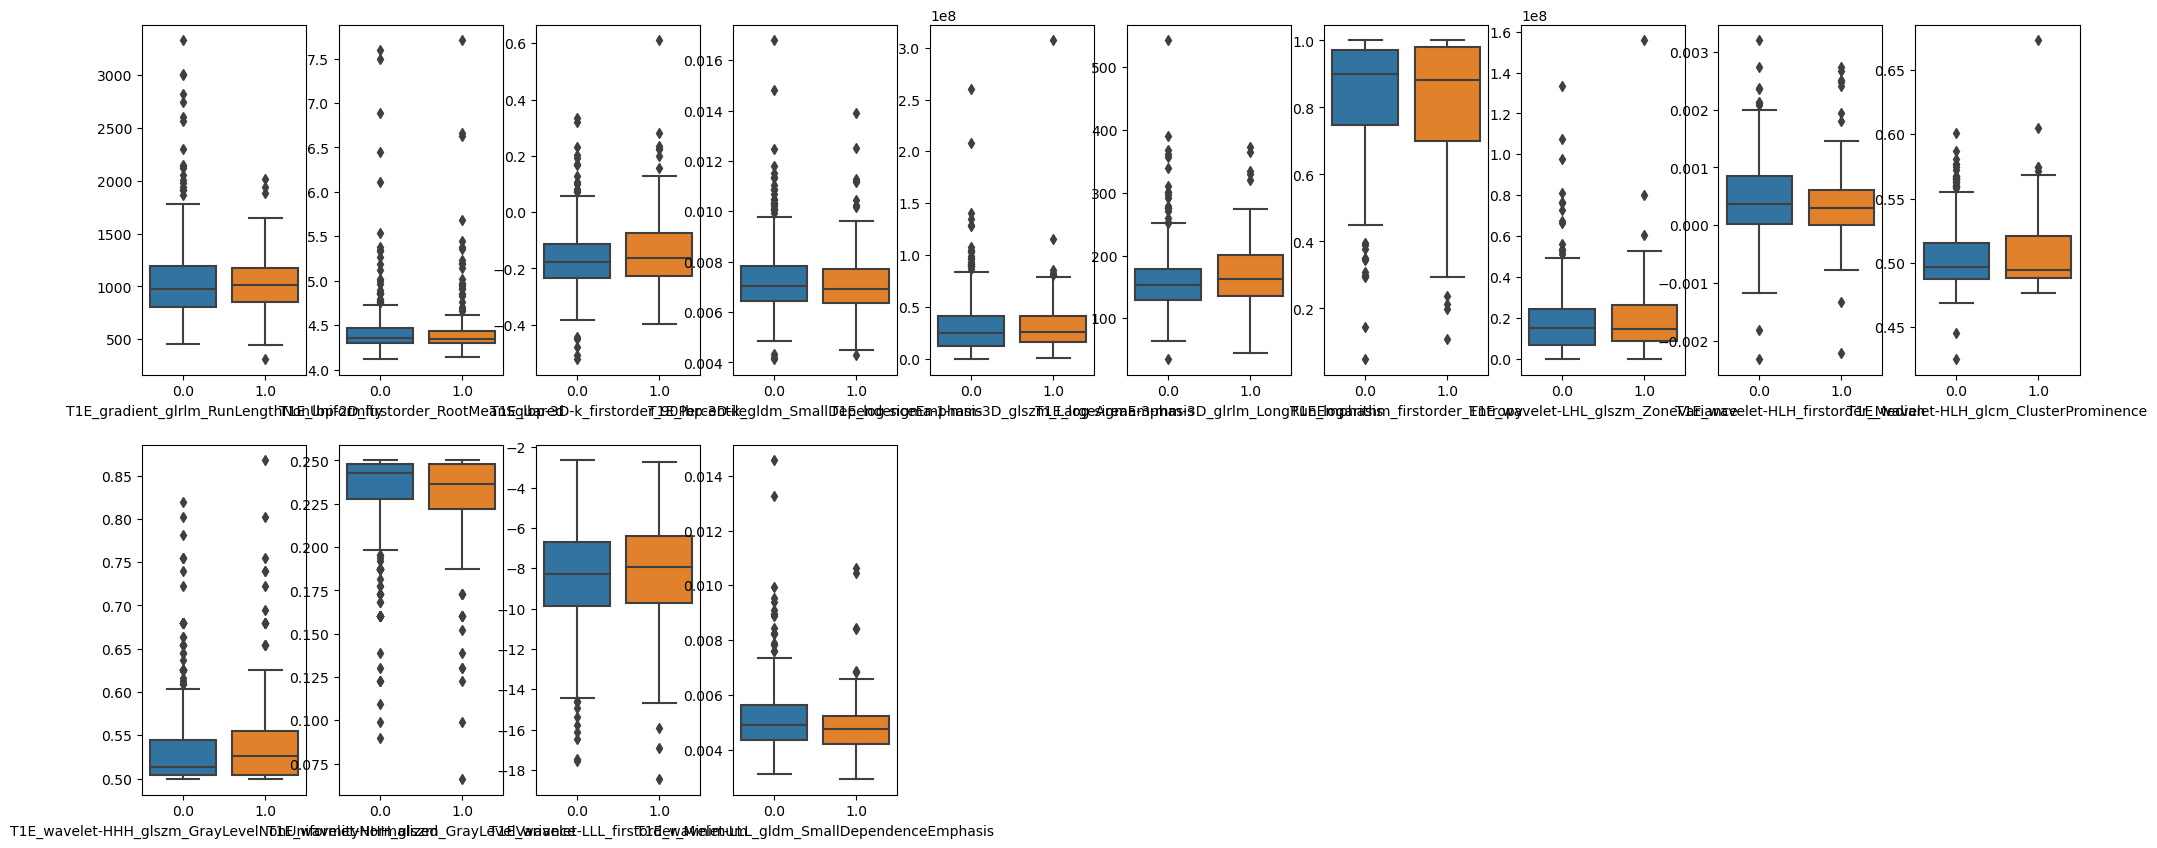

In [76]:
import seaborn as sns
#data=data[(data["pre_risk_grp"] == 1)|(data["pre_risk_grp"] == 7)]
plt.figure(figsize=(25,10))
for i in range(14):
    plt.subplot(2,10,i+1) 
    g = sns.boxplot(x=X_train0['y'], y=X_train0.iloc[:,i])
    plt.xlabel(feature_names[i])
    plt.ylabel('')

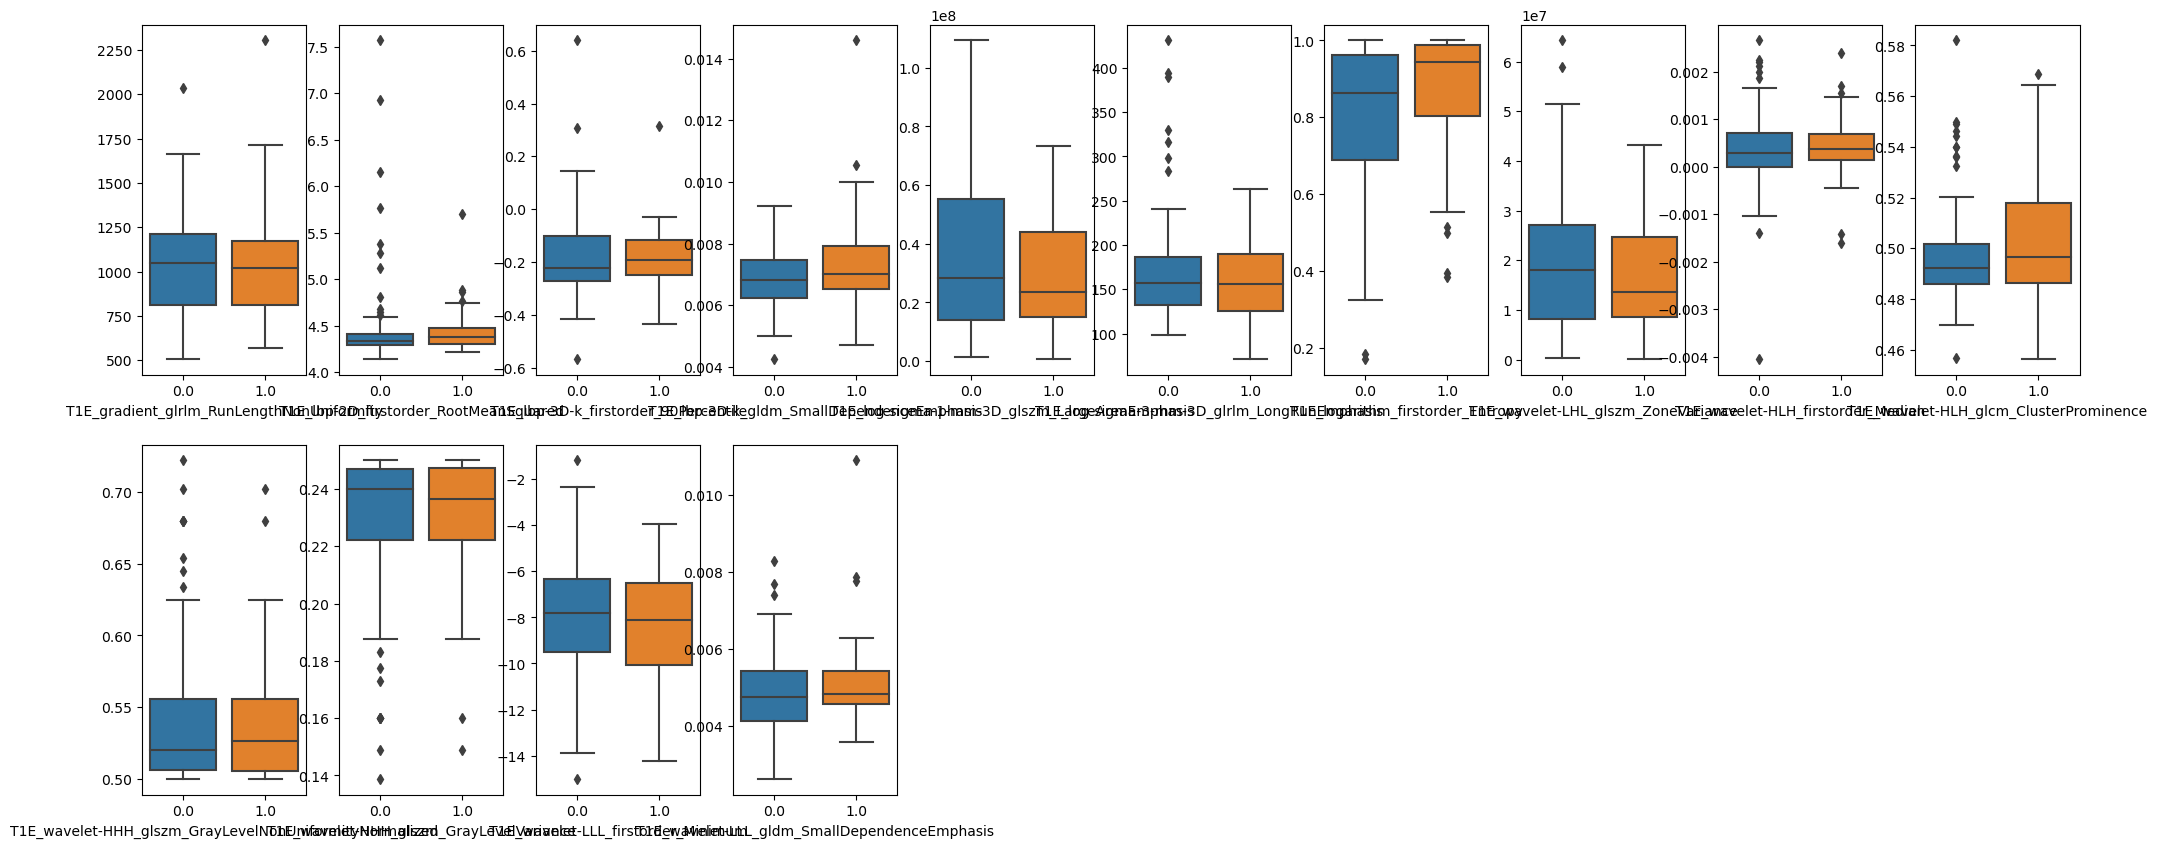

In [79]:
import seaborn as sns
#data=data[(data["pre_risk_grp"] == 1)|(data["pre_risk_grp"] == 7)]
plt.figure(figsize=(25,10))
for i in range(14):
    plt.subplot(2,10,i+1) 
    g = sns.boxplot(x=X_test0['y'], y=X_test0.iloc[:,i])
    plt.xlabel(feature_names[i])
    plt.ylabel('')

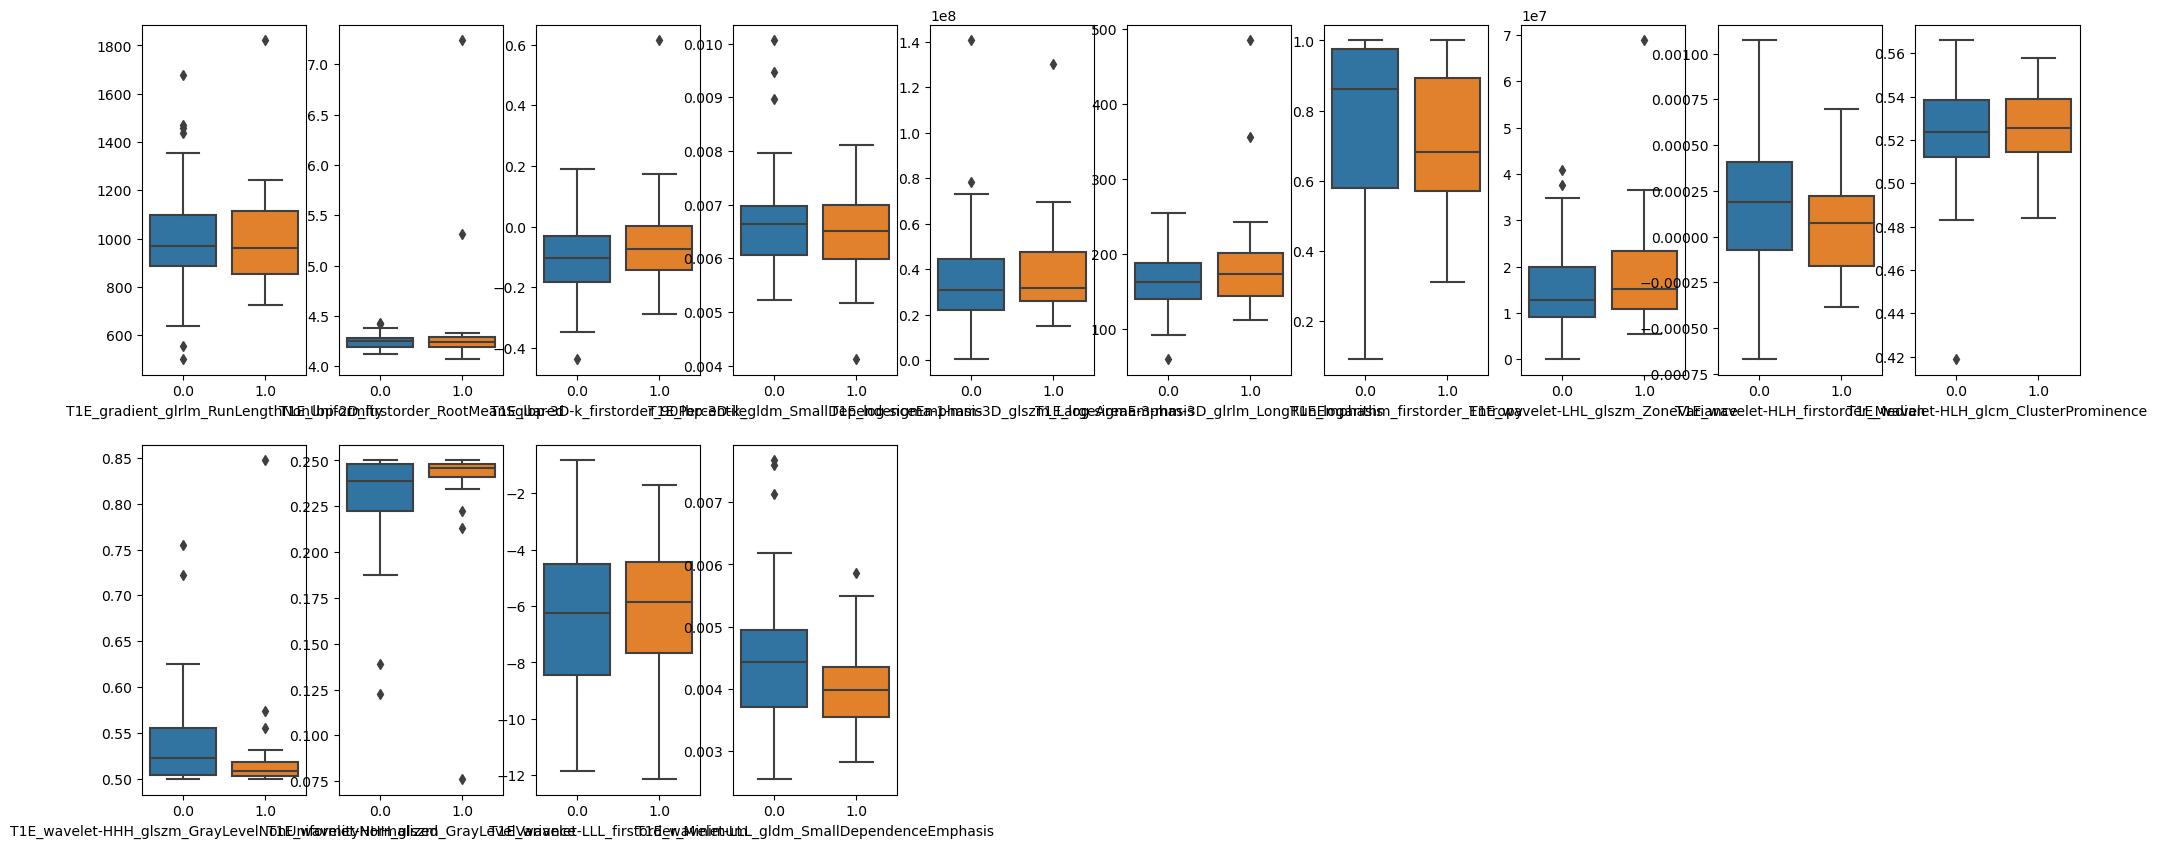

In [78]:
import seaborn as sns
df_val1 = df[df['Cohort'] == 2]
df_val1 = df_val1[df_val1['y_3years'].notnull()]
df_val1.reset_index(inplace=True)
X_clinic_val1 = df_val1.iloc[:, np.r_[2,3,25]]
X_val1 = df_val1.iloc[:, np.r_[1749:3460]]
X_val1=X_val1.loc[:, s]
X_val1['y']= df_val1["y_3years"]

plt.figure(figsize=(25,10))
for i in range(14):
    plt.subplot(2,10,i+1) 
    g = sns.boxplot(x=X_val1['y'], y=X_val1.iloc[:,i])
    plt.xlabel(feature_names[i])
    plt.ylabel('')

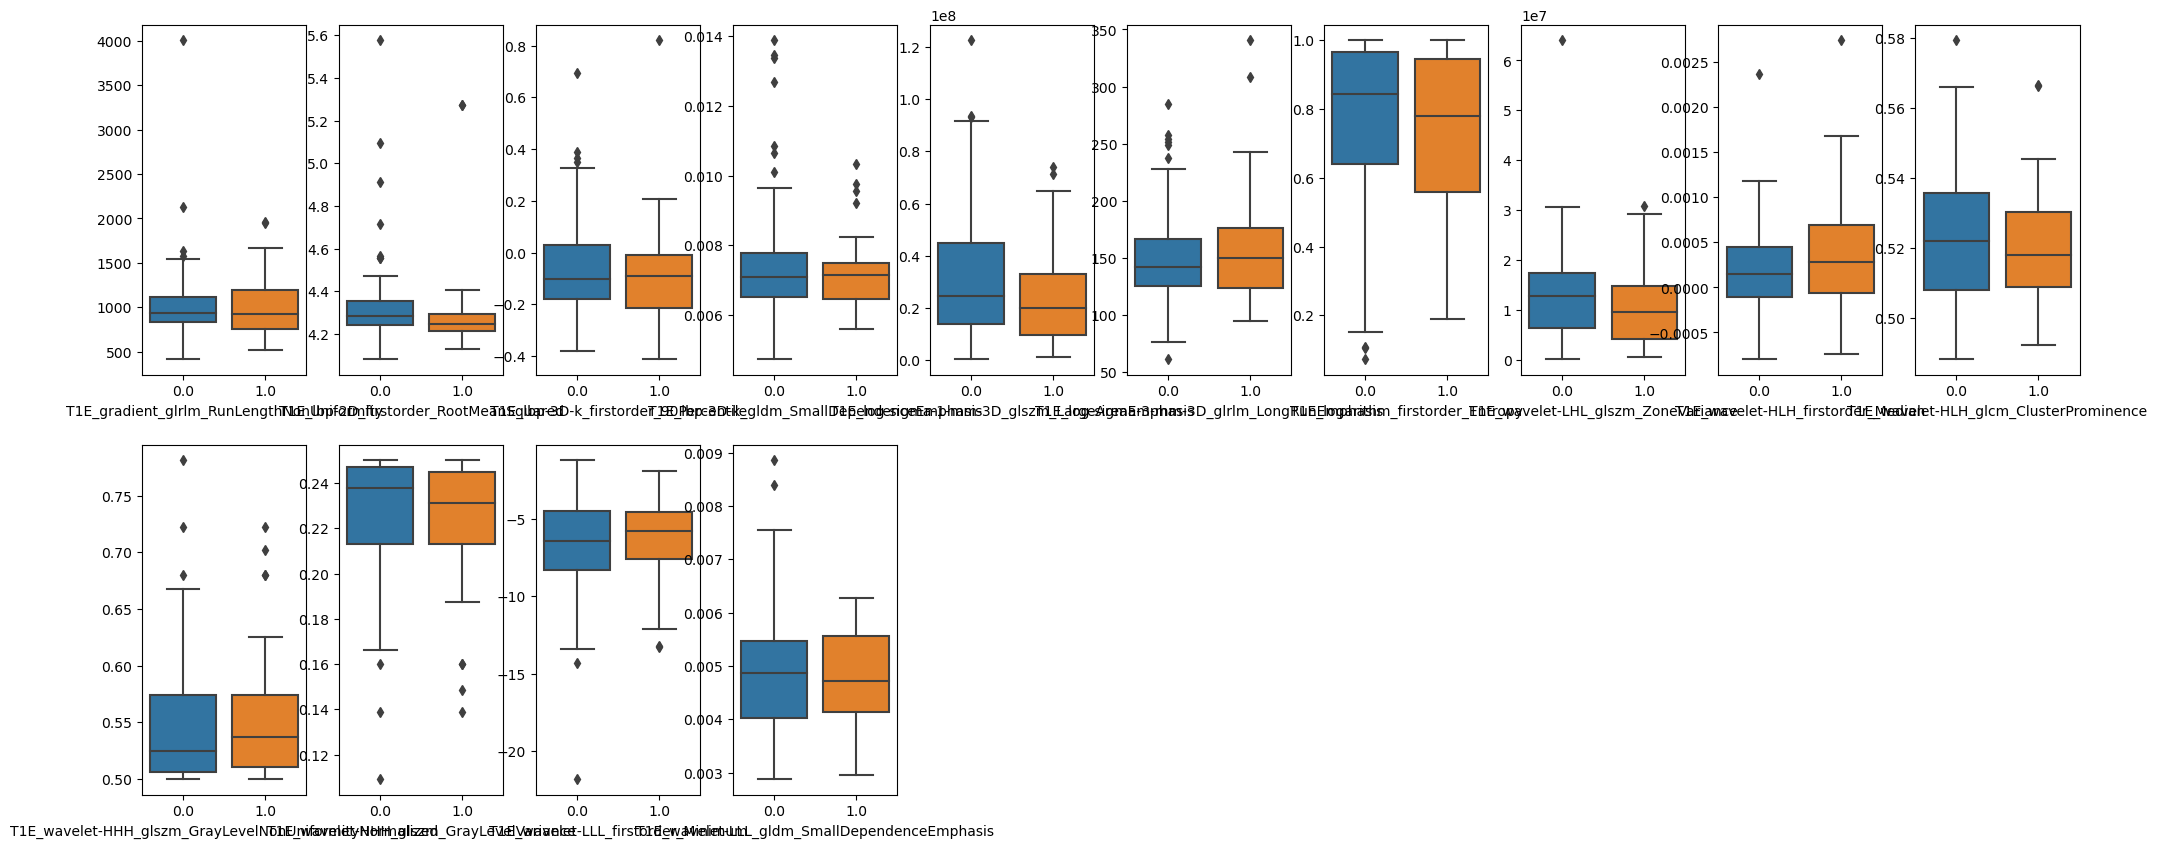

In [80]:
import seaborn as sns
df_val2 = df[df['Cohort'] == 3]
df_val2 = df_val2[df_val2['y_3years'].notnull()]
df_val2.reset_index(inplace=True)
X_clinic_val2 = df_val2.iloc[:, np.r_[2,3,25]]
X_val2 = df_val2.iloc[:, np.r_[1749:3460]]
X_val2=X_val2.loc[:, s]
X_val2['y']= df_val2["y_3years"]

plt.figure(figsize=(25,10))
for i in range(14):
    plt.subplot(2,10,i+1) 
    g = sns.boxplot(x=X_val2['y'], y=X_val2.iloc[:,i])
    plt.xlabel(feature_names[i])
    plt.ylabel('')

In [356]:
ci_train=[]
ci_test=[]
ci_val1=[]
ci_val2=[]
def forwardSelection(X_t1_tumor_train,y_sur_train,X_t1_tumor_test,y_sur_test,X_t1_tumor_val1,y_sur_val1,X_t1_tumor_val2,y_sur_val2):
    model_type ="coxph"
    elimination_criteria = "ci" 
    sl=0.55
    iterations_log = ""
    cols = df_train_c.columns.tolist()
    #def regressor(X_t1_tumor_train,y_sur_train):
     #   regressor = CoxPHSurvivalAnalysis.fit(X_t1_tumor_train,y_sur_train)
      #  return regressor
    
    selected_cols = ['Age','Sex','Hydrocephalus','y','y_time']
    other_cols = cols.copy()
    #print(other_cols)
    other_cols.remove('Age')
    other_cols.remove('Sex')
    other_cols.remove('Hydrocephalus')
    other_cols.remove('index')
    other_cols.remove('y')
    other_cols.remove('y_time')
    cf=CoxPHFitter(penalizer=0.0001)
    cf.fit(df_train_c[selected_cols],"y_time","y")
    #print(model.score(df_train_c[selected_cols],"y_time","y"))
    #print(model.coef_)
    #print(cf.print_summary())
    #print(cf._compute_p_values())
    criteria_train =round(cf.score(df_train_c[selected_cols], scoring_method="concordance_index"),2)
    criteria_test =round(cf.score(df_test_c[selected_cols], scoring_method="concordance_index"),2)
    criteria_val1 =round(cf.score(df_val1_c[selected_cols], scoring_method="concordance_index"),2)
    criteria_val2 =round(cf.score(df_val2_c[selected_cols], scoring_method="concordance_index"),2)
    ci_train.append(criteria_train)
    ci_test.append(criteria_test)
    ci_val1.append(criteria_val1)
    ci_val2.append(criteria_val2)
    pvals = pd.DataFrame(columns = ["Cols","Pval"])
    for j in other_cols:
        cf=CoxPHFitter(penalizer=0.0001)
        cf.fit(df_train_c[selected_cols+[j]],"y_time","y")
        pvals = pvals.append(pd.DataFrame([[j, cf._compute_p_values()[3]]],columns = ["Cols","Pval"]),ignore_index=True)
    pvals = pvals.sort_values(by = ["Pval"]).reset_index(drop=True)
    pvals = pvals[pvals.Pval<=sl]
    #print(pvals)
    if pvals.shape[0] > 0:
        for i in range(pvals.shape[0]):
            cf=CoxPHFitter(penalizer=0.0001)
            cf.fit(df_train_c[selected_cols+[pvals["Cols"][i]]],"y_time","y")
            #iterations_log += str("\nEntered : "+str(pvals["Cols"][i]) + "\n")    
            #iterations_log += "\n\n"+"\nci_train: "+ str(cf.score(df_train_c[selected_cols+[pvals["Cols"][i]]], scoring_method="concordance_index"))+"\nci_test: "+ str(cf.score(df_test_c[selected_cols+[pvals["Cols"][i]]], scoring_method="concordance_index"))+"\nci_val1: "+ str(cf.score(df_val1_c[selected_cols+[pvals["Cols"][i]]], scoring_method="concordance_index"))+"\nci_val2: "+ str(cf.score(df_val2_c[selected_cols+[pvals["Cols"][i]]], scoring_method="concordance_index"))+"\n\n"
            new_criteria_train =round(cf.score(df_train_c[selected_cols+[pvals["Cols"][i]]], scoring_method="concordance_index"),2)
            new_criteria_test =round(cf.score(df_test_c[selected_cols+[pvals["Cols"][i]]], scoring_method="concordance_index"),2)
            new_criteria_val1 =round(cf.score(df_val1_c[selected_cols+[pvals["Cols"][i]]], scoring_method="concordance_index"),2)
            new_criteria_val2 =round(cf.score(df_val2_c[selected_cols+[pvals["Cols"][i]]], scoring_method="concordance_index"),2)
            ci_train.append(new_criteria_train)
            ci_test.append(new_criteria_test)
            ci_val1.append(new_criteria_val1)
            ci_val2.append(new_criteria_val2)
            #print("new_ci",round(new_criteria,2))
            #print("Entered :", pvals["Cols"][i],"\tci_test: "+ str(round(cf.score(df_test_c[selected_cols+[pvals["Cols"][i]]], scoring_method="concordance_index"),2)),"\tci_val1: "+ str(round(cf.score(df_val1_c[selected_cols+[pvals["Cols"][i]]], scoring_method="concordance_index"),2)),"\tci_val2: "+ str(round(cf.score(df_val2_c[selected_cols+[pvals["Cols"][i]]], scoring_method="concordance_index"),2)))
            selected_cols.append(pvals["Cols"][i])
            #other_cols.remove(pvals["Cols"][i])
            '''
            if new_criteria > criteria:
                print("Entered :", pvals["Cols"][i],"\tci_test: "+ str(round(cf.score(df_test_c[selected_cols+[pvals["Cols"][i]]], scoring_method="concordance_index"),2)),"\tci_val1: "+ str(round(cf.score(df_val1_c[selected_cols+[pvals["Cols"][i]]], scoring_method="concordance_index"),2)),"\tci_val2: "+ str(round(cf.score(df_val2_c[selected_cols+[pvals["Cols"][i]]], scoring_method="concordance_index"),2)))
                selected_cols.append(pvals["Cols"][i])
                other_cols.remove(pvals["Cols"][i])
                criteria = new_criteria
            else:
                #print("break : Criteria")
                break
            '''
    return selected_cols,ci_train,ci_test,ci_val1,ci_val2
    #return pvals
selected_cols,ci_train,ci_test,ci_val1,ci_val2 =forwardSelection(X_t1_tumor_train,y_sur_train,X_t1_tumor_test,y_sur_test,X_t1_tumor_val1,y_sur_val1,X_t1_tumor_val2,y_sur_val2)
#print(selected_cols)

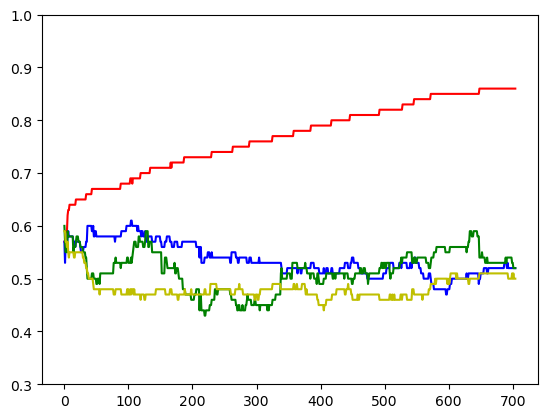

In [358]:
plt.plot(ci_train, color = 'r')
plt.plot(ci_test, color = 'b')
plt.plot(ci_val1, color = 'g')
plt.plot(ci_val2, color = 'y')
plt.ylim(0.3,1.0)
plt.show()

(1066, 7945)
(1066, 6898)
x_train_shape (652, 1714)
y_train_shape (652,)
x_test_shape (163, 1714)
y_test_shape (163,)
x_val1_shape (117, 1714)
y_val1_shape (117,)
x_val2_shape (134, 1714)
y_val2_shape (134,)


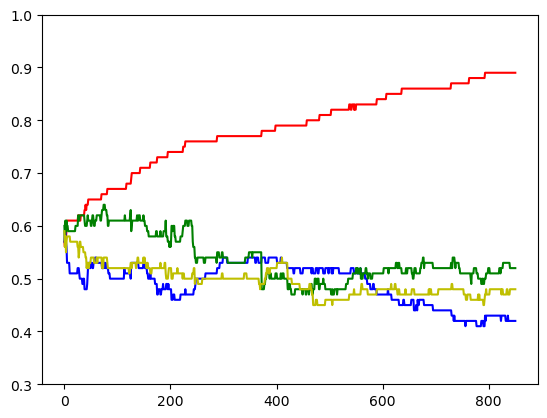

In [366]:
###############################
#t1_tumor
df= pd.read_csv('MB_3_cohort-Joyce-update.csv')
print(df.shape)
nunique = df.nunique()
cols_to_drop = nunique[nunique == 1].index
df=df.drop(cols_to_drop, axis=1)
print(df.shape)

df_train = df[(df['five_fold_label'] == 2)|(df['five_fold_label'] == 3)|(df['five_fold_label'] == 1)|(df['five_fold_label'] == 5)]

df_train_c = df_train.iloc[:, np.r_[1,2,24,32,33,1746:3457]]
#print(df_train_c)
df_train_c.reset_index(inplace=True)
df_train.reset_index(inplace=True)
# X = feature values
X_t1_tumor_train = df_train.iloc[:, np.r_[1,2,24,1746:3457]]
#X_t1_tumor_train=np.array(X_t1_tumor_train).astype(np.float32)
y_train = df_train["y_time_sur"]
y_sur_train = np.empty(dtype=[('label', bool), ('time', float)], shape=652)
y_sur_train['label'] = df_train["y"]
y_sur_train['time'] = df_train["y_time"]
print('x_train_shape',X_t1_tumor_train.shape)
print('y_train_shape',y_train.shape)

#print(X_t1_tumor_train)
#X_t1_tumor = StandardScaler().fit_transform(X_t1_tumor)
#X_t1_tumor = X_t1_tumor[np.isfinite(X_t1_tumor).all(1)]

df_test = df[df['five_fold_label'] == 4]
df_test_c = df_test.iloc[:, np.r_[1,2,24,32,33,1746:3457]]
df_test_c.reset_index(inplace=True)
df_test.reset_index(inplace=True)
X_t1_tumor_test = df_test.iloc[:, np.r_[1,2,24,1746:3457]]
#X_t1_tumor_test=np.array(X_t1_tumor_test).astype(np.float32)
y_test = df_test["y_time_sur"]
y_sur_test = np.empty(dtype=[('label', bool), ('time', float)], shape=163)
y_sur_test['label'] = df_test["y"]
y_sur_test['time'] = df_test["y_time"]
print('x_test_shape',X_t1_tumor_test.shape)
print('y_test_shape',y_test.shape)

df_val1 = df[df['Cohort'] == 2]
df_val1_c = df_val1.iloc[:, np.r_[1,2,24,32,33,1746:3457]]
df_val1_c.reset_index(inplace=True)
df_val1.reset_index(inplace=True)
# X = feature values
X_t1_tumor_val1 = df_val1.iloc[:, np.r_[1,2,24,1746:3457]]
#X_t1_tumor_val1=np.array(X_t1_tumor_val1).astype(np.float32)
y_val1 = df_val1["y_time_sur"]
y_sur_val1 = np.empty(dtype=[('label', bool), ('time', float)], shape=117)
y_sur_val1['label'] = df_val1["y"]
y_sur_val1['time'] = df_val1["y_time"]
print('x_val1_shape',X_t1_tumor_val1.shape)
print('y_val1_shape',y_val1.shape)

df_val2 = df[df['Cohort'] == 3]
df_val2_c = df_val2.iloc[:, np.r_[1,2,24,32,33,1746:3457]]
df_val2_c.reset_index(inplace=True)
df_val2.reset_index(inplace=True)
# X = feature values
X_t1_tumor_val2 = df_val2.iloc[:, np.r_[1,2,24,1746:3457]]
#X_t1_tumor_val2=np.array(X_t1_tumor_val2).astype(np.float32)
y_val2 = df_val2["y_time_sur"]
y_sur_val2 = np.empty(dtype=[('label', bool), ('time', float)], shape=134)
y_sur_val2['label'] = df_val2["y"]
y_sur_val2['time'] = df_val2["y_time"]
print('x_val2_shape',X_t1_tumor_val2.shape)
print('y_val2_shape',y_val2.shape)

ci_train=[]
ci_test=[]
ci_val1=[]
ci_val2=[]
selected_cols,ci_train,ci_test,ci_val1,ci_val2 =forwardSelection(X_t1_tumor_train,y_sur_train,X_t1_tumor_test,y_sur_test,X_t1_tumor_val1,y_sur_val1,X_t1_tumor_val2,y_sur_val2)
plt.plot(ci_train, color = 'r')
plt.plot(ci_test, color = 'b')
plt.plot(ci_val1, color = 'g')
plt.plot(ci_val2, color = 'y')
plt.ylim(0.3,1.0)
plt.show()

In [ ]:
###############################
#t2_peri
df= pd.read_csv('MB_3_cohort-Joyce-update.csv')
print(df.shape)
nunique = df.nunique()
cols_to_drop = nunique[nunique == 1].index
df=df.drop(cols_to_drop, axis=1)
print(df.shape)

df_train = df[(df['five_fold_label'] == 2)|(df['five_fold_label'] == 3)|(df['five_fold_label'] == 1)|(df['five_fold_label'] == 5)]

df_train_c = df_train.iloc[:, np.r_[1,2,24,32,33,3469:3457]]
print(df_train_c)
df_train_c.reset_index(inplace=True)
df_train.reset_index(inplace=True)
# X = feature values
X_t1_tumor_train = df_train.iloc[:, np.r_[1,2,24,1758:3457]]
#X_t1_tumor_train=np.array(X_t1_tumor_train).astype(np.float32)
y_train = df_train["y_time_sur"]
y_sur_train = np.empty(dtype=[('label', bool), ('time', float)], shape=652)
y_sur_train['label'] = df_train["y"]
y_sur_train['time'] = df_train["y_time"]
print('x_train_shape',X_t1_tumor_train.shape)
print('y_train_shape',y_train.shape)

#print(X_t1_tumor_train)
#X_t1_tumor = StandardScaler().fit_transform(X_t1_tumor)
#X_t1_tumor = X_t1_tumor[np.isfinite(X_t1_tumor).all(1)]

df_test = df[df['five_fold_label'] == 4]
df_test_c = df_test.iloc[:, np.r_[1,2,24,32,33,1746:3457]]
df_test_c.reset_index(inplace=True)
df_test.reset_index(inplace=True)
X_t1_tumor_test = df_test.iloc[:, np.r_[1,2,24,1746:3457]]
#X_t1_tumor_test=np.array(X_t1_tumor_test).astype(np.float32)
y_test = df_test["y_time_sur"]
y_sur_test = np.empty(dtype=[('label', bool), ('time', float)], shape=163)
y_sur_test['label'] = df_test["y"]
y_sur_test['time'] = df_test["y_time"]
print('x_test_shape',X_t1_tumor_test.shape)
print('y_test_shape',y_test.shape)

df_val1 = df[df['Cohort'] == 2]
df_val1_c = df_val1.iloc[:, np.r_[1,2,24,32,33,1746:3457]]
df_val1_c.reset_index(inplace=True)
df_val1.reset_index(inplace=True)
# X = feature values
X_t1_tumor_val1 = df_val1.iloc[:, np.r_[1,2,24,1746:3457]]
#X_t1_tumor_val1=np.array(X_t1_tumor_val1).astype(np.float32)
y_val1 = df_val1["y_time_sur"]
y_sur_val1 = np.empty(dtype=[('label', bool), ('time', float)], shape=117)
y_sur_val1['label'] = df_val1["y"]
y_sur_val1['time'] = df_val1["y_time"]
print('x_val1_shape',X_t1_tumor_val1.shape)
print('y_val1_shape',y_val1.shape)

df_val2 = df[df['Cohort'] == 3]
df_val2_c = df_val2.iloc[:, np.r_[1,2,24,32,33,1746:3457]]
df_val2_c.reset_index(inplace=True)
df_val2.reset_index(inplace=True)
# X = feature values
X_t1_tumor_val2 = df_val2.iloc[:, np.r_[1,2,24,1746:3457]]
#X_t1_tumor_val2=np.array(X_t1_tumor_val2).astype(np.float32)
y_val2 = df_val2["y_time_sur"]
y_sur_val2 = np.empty(dtype=[('label', bool), ('time', float)], shape=134)
y_sur_val2['label'] = df_val2["y"]
y_sur_val2['time'] = df_val2["y_time"]
print('x_val2_shape',X_t1_tumor_val2.shape)
print('y_val2_shape',y_val2.shape)

ci_train=[]
ci_test=[]
ci_val1=[]
ci_val2=[]
selected_cols,ci_train,ci_test,ci_val1,ci_val2 =forwardSelection(X_t1_tumor_train,y_sur_train,X_t1_tumor_test,y_sur_test,X_t1_tumor_val1,y_sur_val1,X_t1_tumor_val2,y_sur_val2)
plt.plot(ci_train, color = 'r')
plt.plot(ci_test, color = 'b')
plt.plot(ci_val1, color = 'g')
plt.plot(ci_val2, color = 'y')
plt.ylim(0.3,1.0)
plt.show()

In [215]:
xgb_train = xgboost.DMatrix(X_t1_tumor_train, label=y_train)
xgb_test = xgboost.DMatrix(X_t1_tumor_test, label=y_test)
params = {
    "eta": 0.002,
    "max_depth": 3,
    "objective": "survival:cox",
    "subsample": 0.5
}
model = xgboost.train(params, xgb_train, 10000,evals = [(xgb_test, "test")], verbose_eval=1000)

[0]	test-cox-nloglik:4.53595
[1000]	test-cox-nloglik:4.54547
[2000]	test-cox-nloglik:4.56710
[3000]	test-cox-nloglik:4.59621
[4000]	test-cox-nloglik:4.62020
[5000]	test-cox-nloglik:4.63988
[6000]	test-cox-nloglik:4.67311
[7000]	test-cox-nloglik:4.69653
[8000]	test-cox-nloglik:4.72615
[9000]	test-cox-nloglik:4.75590
[9999]	test-cox-nloglik:4.78661


In [216]:
def c_statistic_harrell(pred, labels):
    total = 0
    matches = 0
    for i in range(len(labels)):
        for j in range(len(labels)):
            if labels[j] > 0 and abs(labels[i]) > labels[j]:
                total += 1
                if pred[j] > pred[i]:
                    matches += 1
    return matches/total

# see how well we can order people by survival
print(c_statistic_harrell(model.predict(xgb_train, ntree_limit=5000), y_train))
print(c_statistic_harrell(model.predict(xgb_test, ntree_limit=5000), y_test))

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


0.9836402466051497
0.5558491895701198


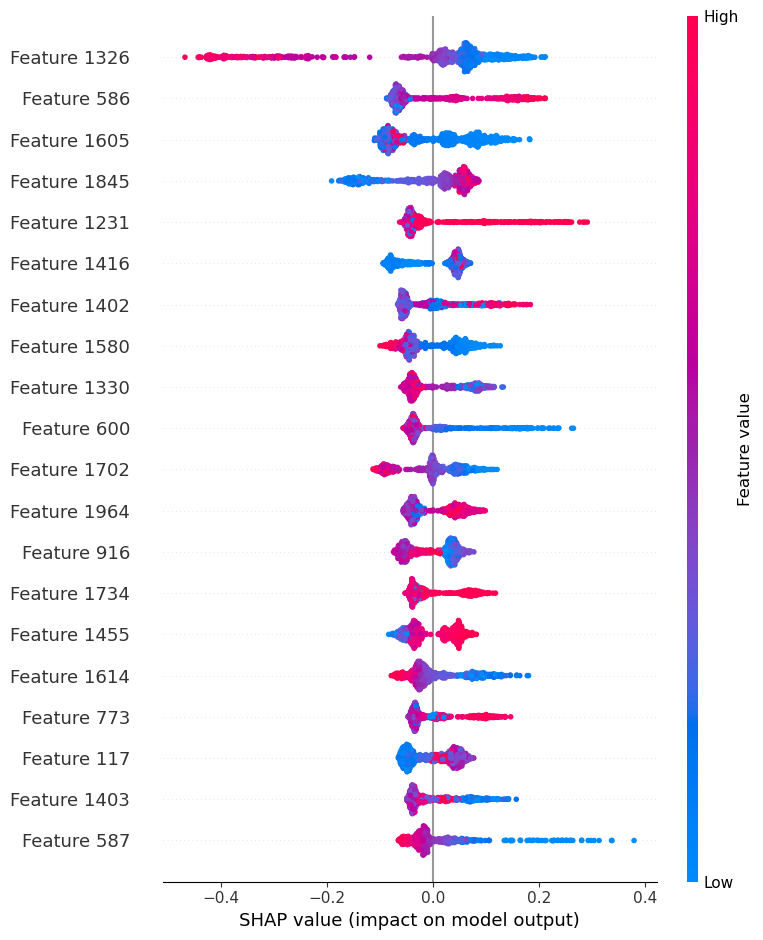

In [217]:
shap_values = shap.TreeExplainer(model).shap_values(X_t1_tumor_train)
shap.summary_plot(shap_values, X_t1_tumor_train)

In [218]:


xgb_val1 = xgboost.DMatrix(X_t1_tumor_val1, label=y_val1)
xgb_val2 = xgboost.DMatrix(X_t1_tumor_val2, label=y_val2)

print(c_statistic_harrell(model.predict(xgb_val1), y_val1))
print(c_statistic_harrell(model.predict(xgb_val2), y_val2))

(117, 1972)
(117,)
(134, 1972)
(134,)
0.615681233933162
0.5312295973884658


In [89]:
from __future__ import print_function
import numpy as np
from sklearn import datasets, linear_model
from genetic_selection import GeneticSelectionCV
import random
import xgboost as xgb
from sksurv.metrics import concordance_index_censored as ci_scikit
from xgbse.metrics import concordance_index

random.seed(45)
estimator = xgb.XGBRegressor(objective='survival:cox',
                       booster='gblinear')
#linear_model.LogisticRegression(solver="liblinear")
#roc_auc
selector = GeneticSelectionCV(estimator,
                              cv=5,
                              verbose=1,
                              scoring="concordance_index",
                              max_features=15,
                              n_population=9040,#this is set to be 10N, being N the number of features
                              crossover_proba=0.5,
                              mutation_proba=0.2,
                              n_generations=40,
                              crossover_independent_proba=0.5,
                              mutation_independent_proba=0.05,
                              tournament_size=50,
                              n_gen_no_change=10,
                              caching=True,
                              n_jobs=-1)
selector = selector.fit(X_t1_tumor_train, y_train)

print(selector.support_)
'''
Tournament Selection:

Tournament selection is a method of selecting an individual from a population of individuals.
Tournament selection involves running several "tournaments" among a few individuals chosen at random from the population.
The winner of each tournament (the one with the best fitness) is selected for crossover.
When the tournament size is smaller, Tournament selection also gives a chance to all individuals to be selected and thus it preserves diversity, although keeping diversity may degrade the convergence speed.
But if the tournament size is larger, weak individuals have a smaller chance to be selected causes loss of diversity .
PseudoCode:

choose k (the tournament size) individuals from the population at random
choose the best individual from pool/tournament with probability p
choose the second best individual with probability p*(1-p)
choose the third best individual with probability p*((1-p)^2)
and so on...
Deterministic tournament selection selects the best individual (when p = 1) in any tournament. A 1-way tournament (k = 1) selection is equivalent to random selection. The chosen individual can be removed from the population that the selection is made from if desired, otherwise individuals can be selected more than once for the next generation. In comparison with the (stochastic) fitness proportionate selection method, tournament selection is often implemented in practice due to its lack of stochastic noise.
n_gen_no_change : int, default None
        If set to a number, it will terminate optimization when best individual is not
        changing in all of the previous ``n_gen_no_change`` number of generations.
max_features : int or None, optional
        The maximum number of features selected.
crossover_proba : float, default=0.5
        Probability of crossover for the genetic algorithm.
    mutation_proba : float, default=0.2
        Probability of mutation for the genetic algorithm.
    n_generations : int, default=40
        Number of generations for the genetic algorithm.
    crossover_independent_proba : float, default=0.1
        Independent probability for each attribute to be exchanged, for the genetic algorithm.
    mutation_independent_proba : float, default=0.05
        Independent probability for each attribute to be mutated, for the genetic algorithm.
    tournament_size : int, default=3
        Tournament size for the genetic algorithm.
'''

ValueError: 'concordance_index' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.

In [ ]:
'''
y = np.empty(dtype=[('label', bool), ('time', float)], shape=1267)
y['label'] = tr_label[:,0]
y['time'] = tr_time[:,0]
print(tr_data.shape)
from sksurv.linear_model import CoxPHSurvivalAnalysis
estimator = CoxPHSurvivalAnalysis(alpha=0.0001).fit(tr_data, y)
risk = estimator.predict(tr_data)
risk_test = estimator.predict(te_data)
from sksurv.metrics import concordance_index_censored as ci_scikit
y_test = np.empty(dtype=[('label', bool), ('time', float)], shape=397)
y_test['label'] = te_label[:,0]
y_test['time'] = te_time[:,0]
b=ci_scikit(y_test['label'],y_test['time'],risk_test)[0]
print('ci_scikit',b)
from lifelines.utils import concordance_index as ci_lifelines
b1=ci_lifelines(y_test['time'],risk_test,y_test['label'])
print('ci_lifelines',b1)
from sksurv.metrics import concordance_index_ipcw
b2=concordance_index_ipcw(y,y_test,risk_test)
print('concordance_index_ipcw',b2)
b3=ci_scikit(y['label'],y['time'],risk)[0]
print('concordance_index',b3)
def fit_and_score_features(X,y_sur):
    n_features = X.shape[1]
    scores = np.empty(n_features)
    m = CoxPHSurvivalAnalysis()
    for j in range(n_features):
        Xj = X[:, j:j+1]
        estimator = m.fit(Xj, y_sur)
        risk = estimator.predict(Xj)
        scores[j] = ci_scikit(y_sur['label'],y_sur['time'],risk)[0]
    return scores

scores = fit_and_score_features(X_t1_tumor,y_sur)
pd.Series(scores).sort_values(ascending=False)
'''